# Predicting Fertility Based on Health Statistics   



Fertility rate is measured as the total number of births for women of child bearing age per 1000 live births.  The total fertility rate is a significant indicator of a nation's population growth or population decline.  The fertility rate is affected by a range of factors including health, population dynamics, economic status, and socioeconomic factors.   

Fertility rates for 21 countries across all 7 continents will be analyzed and compared to determine the most significant factors affecting fertility.  Countries were selected by continent based on available data.  The 3 countries with the most data were selected from each continent.  As Antarctica is populated by approximately 5,000 transitional residents, there is no data from this continent.  To compensate for the lack of data from Antarctica, 5 countries were chosen from Asia, which is the largest and most populated continent.  Four countries were selected from Africa, which is the second largest and most populated continent.  Three countries each were selected from North America, South America, Europe and Australia/Oceania.  

This dataset answers some basic questions including which country has the highest average fertility rate?  Which country has the most stable fertility rate?  What are the most significant features affecting fertility rates?  


## Data Summary:  

The World Bank's Health, Nutrition and Population Statistics database provides key health, nutrition and population statistics gathered from a variety of international and national sources.  This dataset contains health, nutrition and population information for 217 countries and regions.  Themes include global surgery, health financing, HIV/AIDS, immunization, infectious diseases, medical resources and usage, noncommunicable diseases, nutrition, population dynamics, reproductive health, universal health coverage, and water and sanitation. This dataset was downloaded from http://www.worldbank.org.  
Source: https://datacatalog.worldbank.org/dataset/health-nutrition-and-population-statistics.  


## Key Terms:  

**emigration** - is the act of leaving a resident country or place of residence with the intent to settle elsewhere  
**immigration** - the movement of persons into one country from another  
Source: [Wikipedia](https://en.wikipedia.org/wiki/Emigration)

In [1]:
from initial_cleaning import initial_cleaning

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns

%matplotlib inline
sns.set_style('white')
pd.options.display.float_format = '{:.2f}'.format
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [2]:
stats = pd.DataFrame(initial_cleaning('/Users/jamilab/Data_Science/Data_Sets/hnp_stats_csv/HNP_StatsData.csv'))

  Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name     Indicator Code  \
0  % of females ages 15-49 having comprehensive c...  SH.HIV.KNOW.FE.ZS   
1  % of males ages 15-49 having comprehensive cor...  SH.HIV.KNOW.MA.ZS   
2  Adolescent fertility rate (births per 1,000 wo...        SP.ADO.TFRT   
3  Adults (ages 15+) and children (0-14 years) li...        SH.HIV.TOTL   
4  Adults (ages 15+) and children (ages 0-14) new...     SH.HIV.INCD.TL   

    1960   1961   1962   1963   1964   1965     ...       2009  2010  2011  \
0    nan    nan    nan    nan    nan    nan     ...        nan   nan   nan   
1    nan    nan    nan    nan    nan    nan     ...        nan   nan   nan   
2 134.22 134.84 135.57 135.44 135.27 134.95     ...      50.10 49.90 49.72   
3    nan    nan    nan    nan    nan    nan     ..

In [3]:
# view shape of data

stats.shape

(99197, 63)

In [4]:
# get column names

stats.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', 'Unnamed: 62'],
      dtype='object')

In [5]:
# rename columns

stats = stats.rename(columns = {'Country Name': 'Country', 'Country Code': 'Country_Code'
                     , 'Indicator Name': 'Indicator_Name', 'Indicator Code':'Indicator_Code'})

In [6]:
# check values for unnamed column

stats['Unnamed: 62'].describe()

count   0.00
mean     nan
std      nan
min      nan
25%      nan
50%      nan
75%      nan
max      nan
Name: Unnamed: 62, dtype: float64

In [7]:
# drop empty unnamed column

stats = stats.drop('Unnamed: 62', 1)

In [8]:
# https://stackoverflow.com/questions/45066873/pandas-melt-with-multiple-value-vars
# transform df

stats = (stats.set_index(['Country', 'Country_Code', 'Indicator_Name', 'Indicator_Code'])
   .rename_axis(['Year'], axis=1)
   .stack()
   .reset_index())

In [9]:
stats = stats.rename(columns = {0:'Index_Value'})

In [10]:
# verify columns renamed

stats.head()

,Country,Country_Code,Indicator_Name,Indicator_Code,Year,Index_Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,134.22
1,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1961,134.84
2,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1962,135.57
3,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1963,135.44
4,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1964,135.27


In [11]:
# get shape of transformed df

stats.shape

(2714608, 6)

In [12]:
# verify no nulls in transformed df

stats.isnull().sum()

Country           0
Country_Code      0
Indicator_Name    0
Indicator_Code    0
Year              0
Index_Value       0
dtype: int64

In [13]:
# https://stackoverflow.com/questions/32751229/pandas-sum-by-groupby-but-exclude-certain-columns

df = stats.groupby(stats['Country']).count()
df

,Country_Code,Indicator_Name,Indicator_Code,Year,Index_Value
Country,,,,,
Afghanistan,12058,12058,12058,12058,12058
Albania,12210,12210,12210,12210,12210
Algeria,12506,12506,12506,12506,12506
American Samoa,585,585,585,585,585
Andorra,1649,1649,1649,1649,1649
Angola,11831,11831,11831,11831,11831
Antigua and Barbuda,10911,10911,10911,10911,10911
Arab World,9143,9143,9143,9143,9143
Argentina,12438,12438,12438,12438,12438


In [14]:
df.describe()

,Country_Code,Indicator_Name,Indicator_Code,Year,Index_Value
count,258.00,258.00,258.00,258.00,258.00
mean,10521.74,10521.74,10521.74,10521.74,10521.74
std,3243.97,3243.97,3243.97,3243.97,3243.97
min,307.00,307.00,307.00,307.00,307.00
25%,9341.75,9341.75,9341.75,9341.75,9341.75
50%,11956.00,11956.00,11956.00,11956.00,11956.00
75%,12364.00,12364.00,12364.00,12364.00,12364.00
max,13037.00,13037.00,13037.00,13037.00,13037.00


In [15]:
series = df['Index_Value'].sort_values(ascending=False)
series.head(60)

Country
Indonesia             13037
Peru                  12974
Bangladesh            12906
Colombia              12896
Mexico                12822
Burkina Faso          12821
Senegal               12793
Egypt, Arab Rep.      12775
Morocco               12738
Ghana                 12733
Niger                 12661
Malawi                12650
Philippines           12641
Nepal                 12641
Tanzania              12631
Ecuador               12623
Pakistan              12619
Jamaica               12602
Rwanda                12596
Lesotho               12593
Dominican Republic    12584
Botswana              12583
El Salvador           12570
Cameroon              12569
Guatemala             12562
Mali                  12556
Togo                  12555
Paraguay              12546
Uganda                12544
Costa Rica            12534
Benin                 12524
Nicaragua             12510
Algeria               12506
Ethiopia              12493
Swaziland             12492
Kenya       

### Based on the selection criteria, the countries analyzed are listed by continent in descending order starting with the country with the most available data:  

#### Asia - Indonesia, Bangladesh, Phillipines, Nepal, Pakistan  
#### Africa - Burkina Faso, Senegal, Egypt, Arab Rep., Morocco   
#### Europe - Netherlands, Sweden, Spain  
#### North America - Mexico, Jamaica, Dominican Republic  
#### South America - Peru, Colombia, Ecuador  
#### Australia/oceania - Australia, Papua New guinea, New Zealand 

In [16]:
# create df of countries

ind = pd.DataFrame(stats[stats.Country=='Indonesia'])
ban = pd.DataFrame(stats[stats.Country=='Bangladesh'])
phi = pd.DataFrame(stats[stats.Country=='Philippines'])
nepal = pd.DataFrame(stats[stats.Country=='Nepal'])
pak = pd.DataFrame(stats[stats.Country=='Pakistan'])
bur = pd.DataFrame(stats[stats.Country=='Burkina Faso'])
sen = pd.DataFrame(stats[stats.Country=='Senegal'])
egypt = pd.DataFrame(stats[stats.Country=='Egypt, Arab Rep.'])
mor = pd.DataFrame(stats[stats.Country=='Morocco'])

In [17]:
neth = pd.DataFrame(stats[stats.Country=='Netherlands'])
swe = pd.DataFrame(stats[stats.Country=='Sweden'])
spain = pd.DataFrame(stats[stats.Country=='Spain'])
mex = pd.DataFrame(stats[stats.Country=='Mexico'])
jam = pd.DataFrame(stats[stats.Country=='Jamaica'])
domrep = pd.DataFrame(stats[stats.Country=='Dominican Republic'])

In [18]:
peru = pd.DataFrame(stats[stats.Country=='Peru'])
col = pd.DataFrame(stats[stats.Country=='Colombia'])
ecu = pd.DataFrame(stats[stats.Country=='Ecuador'])
aus = pd.DataFrame(stats[stats.Country=='Australia'])
png = pd.DataFrame(stats[stats.Country=='Papua New Guinea'])
nze = pd.DataFrame(stats[stats.Country=='New Zealand'])

In [19]:
# combine individual country dataframes & set column names

world = pd.concat([ind, ban, phi, nepal, pak, bur, sen, egypt, mor, neth, swe, spain, mex, jam, domrep, 
                  peru, col, ecu, aus, png, nze], axis=0, ignore_index=True)
stats.columns = world.columns

In [20]:
# verify column names and data

world.head()

,Country,Country_Code,Indicator_Name,Indicator_Code,Year,Index_Value
0,Indonesia,IDN,% of females ages 15-49 having comprehensive c...,SH.HIV.KNOW.FE.ZS,2003,0.80
1,Indonesia,IDN,% of females ages 15-49 having comprehensive c...,SH.HIV.KNOW.FE.ZS,2007,9.10
2,Indonesia,IDN,% of females ages 15-49 having comprehensive c...,SH.HIV.KNOW.FE.ZS,2012,11.40
3,Indonesia,IDN,% of males ages 15-49 having comprehensive cor...,SH.HIV.KNOW.MA.ZS,2003,0.90
4,Indonesia,IDN,% of males ages 15-49 having comprehensive cor...,SH.HIV.KNOW.MA.ZS,2007,13.70


## How do the fertility rates of the 21 countries compare to each other?

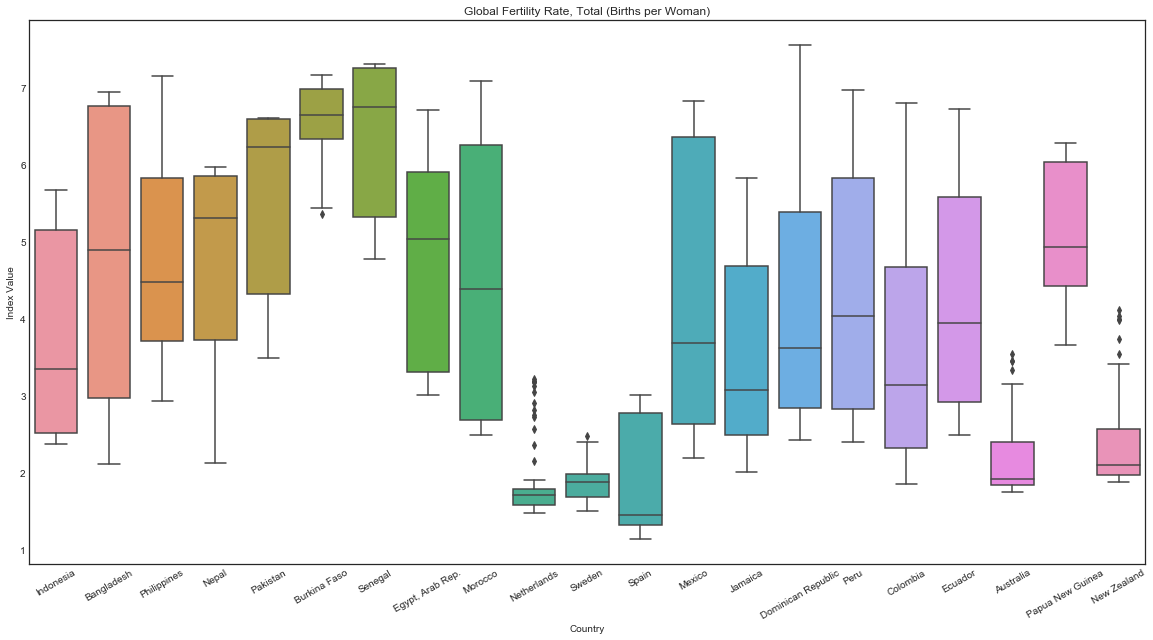

In [21]:
# global fertility rate, total (births, per woman)

sns.boxplot(x='Country', y='Index_Value', data=world[world.Indicator_Code=='SP.DYN.TFRT.IN'])
plt.xticks(rotation=30)
plt.title('Global Fertility Rate, Total (Births per Woman)')
plt.ylabel('Index Value');

## Which country has the highest average fertility rate?  

Based on the boxplot, Senegal appears to have the highest average fertility rate.  A closer look at a bar graph and statistics for Senegal's fertility rate confirms that Senegal does have the highest fertility rate of the selected countries.  

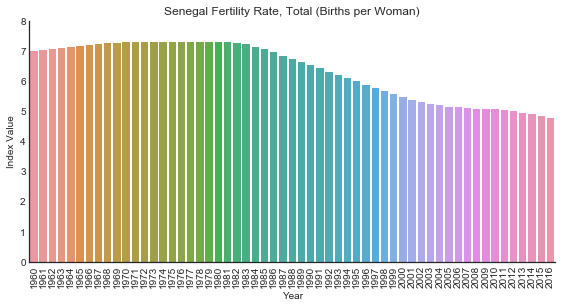

In [22]:
# Senegal fertility rate, total (births, per woman)

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=sen.loc[(sen.Indicator_Code == 'SP.DYN.TFRT.IN')],
                   kind='bar',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('Senegal Fertility Rate, Total (Births per Woman)')
plt.ylabel('Index Value')
plt.ylim(ymax=8.0)
plt.ylim(ymin=0);

In [23]:
sen.loc[(sen.Indicator_Code == 'SP.DYN.TFRT.IN')].describe()

,Index_Value
count,57.00
mean,6.36
std,0.94
min,4.77
25%,5.31
50%,6.74
75%,7.26
max,7.31


**Based on the statistics, in addition to having the highest fertility rate, Senegal also has a stable fertility rate, but is it the most stable?**

## Which country has the most stable fertility rate?  

Senegal's small standard deviation indicates a small spread in variance between total births per year.  However, Spain has the most stable fertility rate, in conjunction with the lowest fertility rate among the countries selected.  Spain's standard deviation of 0.71 indicates it has less variance in births than Senegal.

In [24]:
spain.loc[(spain.Indicator_Code == 'SP.DYN.TFRT.IN')].describe()

,Index_Value
count,57.00
mean,1.90
std,0.71
min,1.13
25%,1.32
50%,1.45
75%,2.77
max,3.01


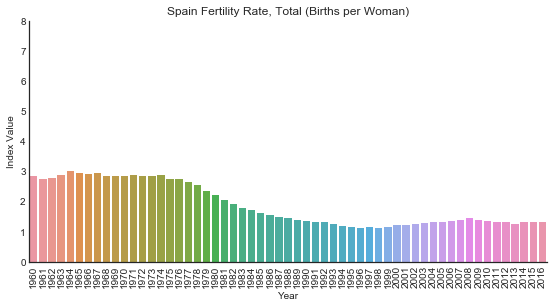

In [25]:
# Spain fertility rate, total (births, per woman)

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=spain.loc[(spain.Indicator_Code == 'SP.DYN.TFRT.IN')],
                   kind='bar',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('Spain Fertility Rate, Total (Births per Woman)')
plt.ylabel('Index Value')
plt.ylim(ymax=8.0)
plt.ylim(ymin=0);

## Supervised Learning Model Selection and Evaluation:  

Several supervised models were tested and evaluated based on accuracy and recall.  Accuracy is (define).  Recall is defined as the ratio of tp/(tp + fn) where tp is the number of true positives and fn the number of false negatives.  The recall is the intuitive ability of the classifier to find and correctly classify all the true positive samples.  

The supervised models evaluated and tested include random forest classifier, support vector machine classifier and XGBoost classifier.  Feature importance was calculated for both random forest and XGBoost.

In [26]:
# get dummies for North America

features = pd.get_dummies(world[['Country_Code', 'Indicator_Code', 'Year', 'Index_Value']])

In [27]:
features.shape

(264811, 463)

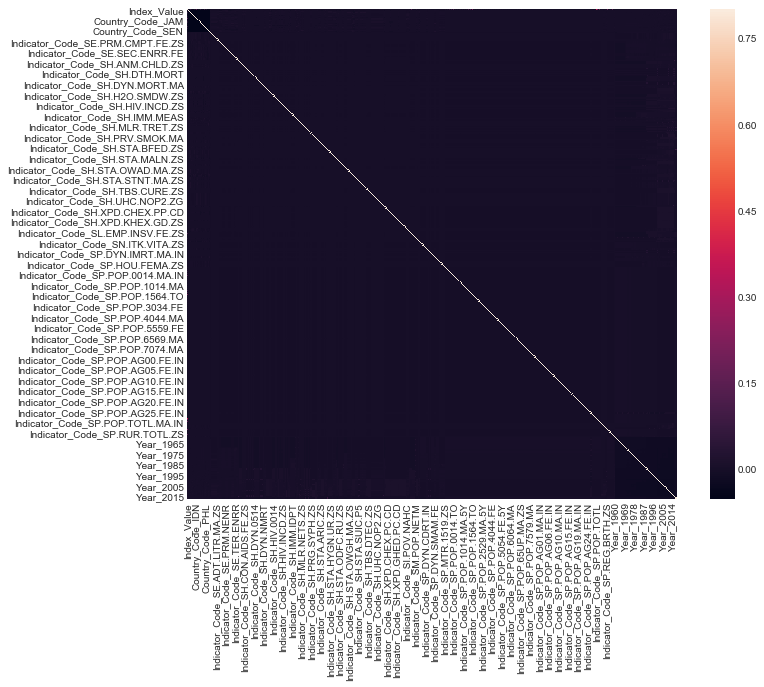

In [28]:
# index value is the only numeric column

corrmat = features.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [29]:
features.corr()

,Index_Value,Country_Code_AUS,Country_Code_BFA,Country_Code_BGD,Country_Code_COL,Country_Code_DOM,Country_Code_ECU,Country_Code_EGY,Country_Code_ESP,Country_Code_IDN,...,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017
Index_Value,1.00,-0.02,-0.03,0.06,-0.01,-0.03,-0.03,0.02,-0.00,0.13,...,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.02
Country_Code_AUS,-0.02,1.00,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00
Country_Code_BFA,-0.03,-0.05,1.00,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,...,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00
Country_Code_BGD,0.06,-0.05,-0.05,1.00,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,...,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00
Country_Code_COL,-0.01,-0.05,-0.05,-0.05,1.00,-0.05,-0.05,-0.05,-0.05,-0.05,...,0.00,0.00,0.01,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00
Country_Code_DOM,-0.03,-0.05,-0.05,-0.05,-0.05,1.00,-0.05,-0.05,-0.05,-0.05,...,-0.00,-0.00,0.00,-0.00,0.00,0.01,0.00,0.00,0.00,-0.00
Country_Code_ECU,-0.03,-0.05,-0.05,-0.05,-0.05,-0.05,1.00,-0.05,-0.05,-0.05,...,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00
Country_Code_EGY,0.02,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,1.00,-0.05,-0.05,...,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00
Country_Code_ESP,-0.00,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,1.00,-0.05,...,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00
Country_Code_IDN,0.13,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,1.00,...,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00


In [30]:
from sklearn.model_selection import train_test_split

X = features.drop(['Indicator_Code_SP.DYN.TFRT.IN'], 1)
y = features[('Indicator_Code_SP.DYN.TFRT.IN')]

# Divide into training and test sets

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42)

In [31]:
# random forest classifier

from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train, y_train)

cross_val_score(rfc, X_test, y_test, cv=10)

array([ 0.99496539,  0.99559471,  0.99509125,  0.99496539,  0.99546885,
        0.99546885,  0.99534298,  0.99521591,  0.99521591,  0.99509002])

**The cross validation scores suggest overfitting, so checking recall might be a more accurate indicator of model performance.**

In [32]:
from sklearn.metrics import recall_score

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))

	Recall: 0.353


**35.3% recall is low for a model with cross validation scores at 99%.  Feature engineering will be performed in an attempt to increase recall.**  

In [33]:
# support vector machine classifier

from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [34]:
# svc cross validation

cross_val_score(svc, X_test, y_test, cv=10)

array([ 0.99546885,  0.99546885,  0.99546885,  0.99546885,  0.99546885,
        0.99546885,  0.99546885,  0.9955936 ,  0.9955936 ,  0.9955936 ])

In [35]:
# svc recall score

y_pred = svc.predict(X_test)
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))

	Recall: 0.000


A recall score of 0 indicates that this model is not effective at all for correctly classifying true posititves in this dataset.

In [37]:
# xgboost classifier

from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [38]:
# xgboost cross validation

cross_val_score(xgb, X_test, y_test, cv=10)

array([ 0.99546885,  0.99546885,  0.99546885,  0.99546885,  0.99546885,
        0.99546885,  0.99546885,  0.9955936 ,  0.9955936 ,  0.9955936 ])

In [39]:
# xgboost recall score

y_pred = xgb.predict(X_test)
print("\tRecall: %1.3f" % recall_score(y_pred, y_test))

	Recall: 0.000


/Users/jamilab/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


## What are the most significant features influencing fertility rates?

Feature ranking:
1. feature 0 (0.315626)
2. feature 2 (0.011860)
3. feature 21 (0.011273)
4. feature 13 (0.010930)
5. feature 20 (0.010900)
6. feature 312 (0.010427)
7. feature 400 (0.010419)
8. feature 8 (0.009364)
9. feature 15 (0.008835)
10. feature 14 (0.008627)
11. feature 1 (0.008161)
12. feature 10 (0.007989)
13. feature 328 (0.007880)
14. feature 16 (0.007241)
15. feature 300 (0.007230)
16. feature 3 (0.007079)
17. feature 284 (0.007064)
18. feature 19 (0.006865)
19. feature 12 (0.006811)
20. feature 326 (0.006760)
21. feature 7 (0.006735)
22. feature 280 (0.006634)
23. feature 4 (0.006571)
24. feature 214 (0.006510)
25. feature 292 (0.006439)
26. feature 278 (0.006339)
27. feature 302 (0.006258)
28. feature 11 (0.006230)
29. feature 294 (0.006012)
30. feature 324 (0.005928)
31. feature 308 (0.005664)
32. feature 5 (0.005604)
33. feature 6 (0.005591)
34. feature 286 (0.005447)
35. feature 306 (0.005431)
36. feature 47 (0.005385)
37. feature 404 (0.005097)
38. feature 105 (0.005

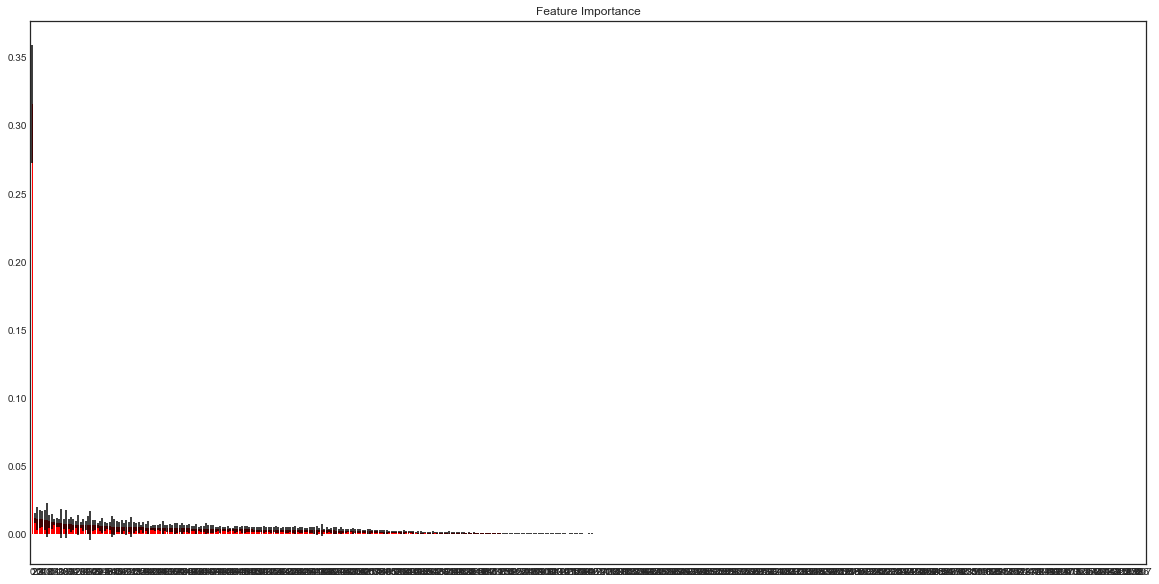

In [43]:
# LAUREN LOOK AT THIS CHART AT THE BOTTOM; I WANT TO CHART THE TOP 5 FEATURES ONLY. I HAVEN'T BEEN ABLE TO GET IT

# calculate & plot feature importance for random forest classifier

importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

feature_names = features.columns # e.g. ['A', 'B', 'C', 'D', 'E']
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
#plt.xticks(range(X_train.shape[1]), feature_names)
plt.xlim([-1, X_train.shape[1]])
plt.show()

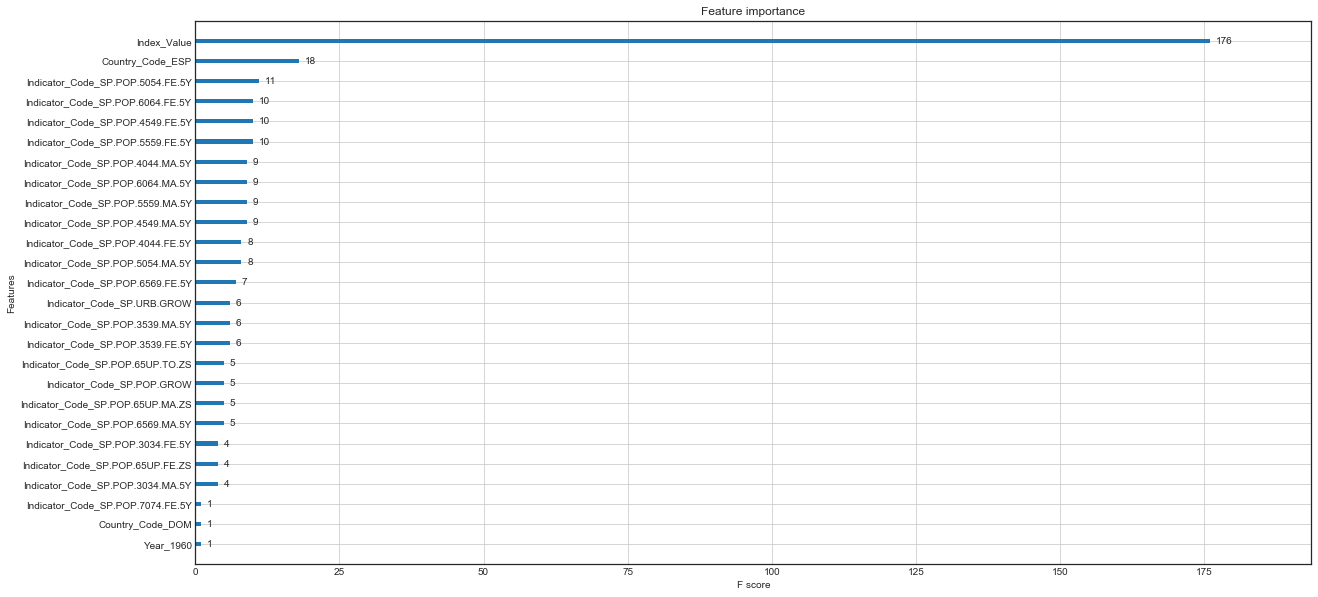

In [45]:
# xgboost classifier

from xgboost import plot_importance

plot_importance(xgb)
plt.show()

In [46]:
# delete variables; models perform better

del X_train
del X_test
del y_pred
del rfc
del svc
del xgb
del model

## Dimensionality Reduction via Principal Components Analysis (PCA)

In [47]:
# PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [48]:
pca.components_

array([[  1.00000000e+00,  -6.04642313e-10,  -8.56888217e-10,
          1.91499474e-09,  -1.84915164e-10,  -9.21464636e-10,
         -8.33996165e-10,   5.08702303e-10,  -1.94113269e-11,
          3.97861247e-09,  -1.06149391e-09,  -4.50009254e-10,
          1.27805025e-09,  -7.01885394e-10,  -5.70147447e-10,
         -9.63465893e-10,   2.06718539e-09,  -5.40723796e-10,
          6.92923023e-10,  -9.44049466e-10,  -9.11068324e-10,
         -8.76306868e-10,  -1.00396351e-10,  -1.27335618e-11,
         -1.27326690e-11,  -1.27326951e-11,  -1.27328373e-11,
         -1.27327384e-11,  -1.27327874e-11,  -2.33149738e-12,
         -4.31300796e-11,  -4.31299724e-11,  -4.87790854e-11,
         -8.06098138e-11,  -7.60371556e-11,  -7.60366528e-11,
         -5.62210966e-11,  -4.50128858e-11,  -4.50127445e-11,
         -7.27211688e-11,  -6.52786566e-11,  -6.52785284e-11,
         -3.29979329e-11,  -3.09355199e-11,  -3.09355432e-11,
         -6.54601038e-11,  -5.31750380e-11,  -4.57330965e-11,
        

In [49]:
pca.transform(X)

array([[ -1.22288464e+06,   6.15089323e-01],
       [ -1.22287634e+06,   6.09482575e-01],
       [ -1.22287404e+06,   6.08908135e-01],
       ..., 
       [ -1.22288351e+06,  -9.68620243e-03],
       [ -1.22288329e+06,  -8.70872026e-03],
       [ -1.22288326e+06,  -9.43478837e-03]])

In [50]:
# percentage of variance in data explained by each component

pca.explained_variance_ratio_

array([  1.00000000e+00,   9.45240657e-16])

In [51]:
X_pca = pca.transform(X)

## K-Means Clustering

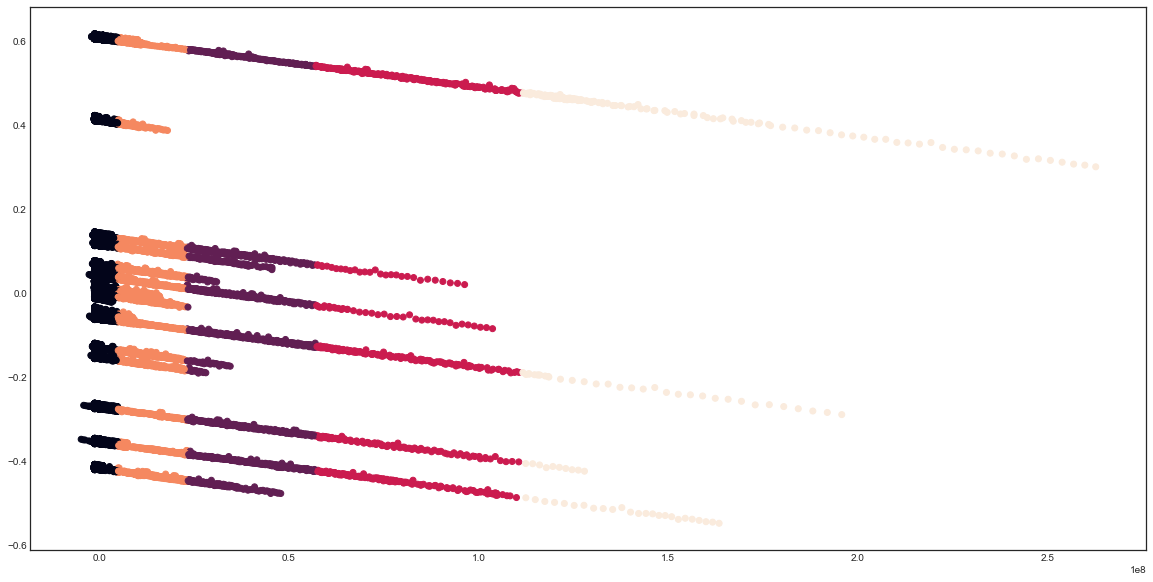

Comparing k-means clusters against the data:
Indicator_Code_SP.DYN.TFRT.IN       0     1
row_0                                      
0                              254357  1197
1                                2047     0
2                                 729     0
3                                6253     0
4                                 228     0


In [52]:
# k-means

from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

# Calculate predicted values.
km = KMeans(n_clusters=5, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=km)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(km, y))

**While the clusters have good separation without overlap, their shape is not the typical spherical shape possibly due to the data being categorical.**

## Model Evaluation After PCA

In [53]:
# Divide into training and test sets

X_train, X_test, y_train, y_test = train_test_split(
    X_pca,
    y,
    test_size=0.3,
    random_state=42)

In [54]:
# random forest classifier

rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train, y_train)
cross_val_score(rfc, X_test, y_test, cv=10)

array([ 0.99458779,  0.99471366,  0.99534298,  0.99496539,  0.99559471,
        0.99370673,  0.99483952,  0.99446053,  0.99433463,  0.99458643])

In [55]:
# rfc recall score

y_pred = rfc.predict(X_test)
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))

	Recall: 0.188


**While the cross validation scores remain consistent, recall dropped approximately 25%.  Dimensionality reduction lead to reduction in predictive power based on the recall score.**

In [56]:
# gradient boost classifier

# We'll make 500 iterations, use 2-deep trees, and set loss function
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

In [57]:
# gradient boost classifier cross validation

cross_val_score(clf, X_test, y_test, cv=10)

array([ 0.99534298,  0.99534298,  0.99546885,  0.99546885,  0.99546885,
        0.99546885,  0.99546885,  0.99546771,  0.99546771,  0.99546771])

In [58]:
#y_pred = clf.predict(X_test)
print("\tRecall: %1.3f" % recall_score(y_test, predict_test))

	Recall: 0.000


In [59]:
# xgboost classifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [60]:
# xgboost cross validation

cross_val_score(xgb, X_test, y_test, cv=10)

array([ 0.99546885,  0.99546885,  0.99546885,  0.99546885,  0.99546885,
        0.99546885,  0.99546885,  0.9955936 ,  0.9955936 ,  0.9955936 ])

In [61]:
# xgboost recall score

y_pred = xgb.predict(X_test)
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))

	Recall: 0.000


## What are the most important features affecting fertility rates?

Feature ranking:
1. feature 1 (0.886072)
2. feature 0 (0.113928)


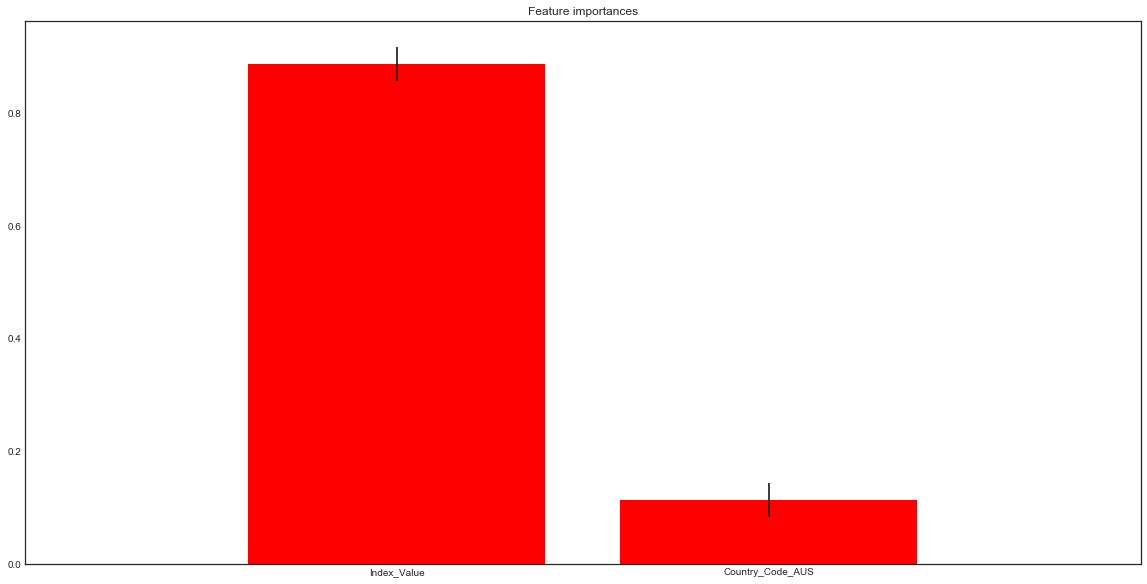

In [64]:
# calculate & plot feature importance for random forest classifier

importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

feature_names = features.columns # e.g. ['A', 'B', 'C', 'D', 'E']
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names)
plt.xlim([-1, X_train.shape[1]])
plt.show()

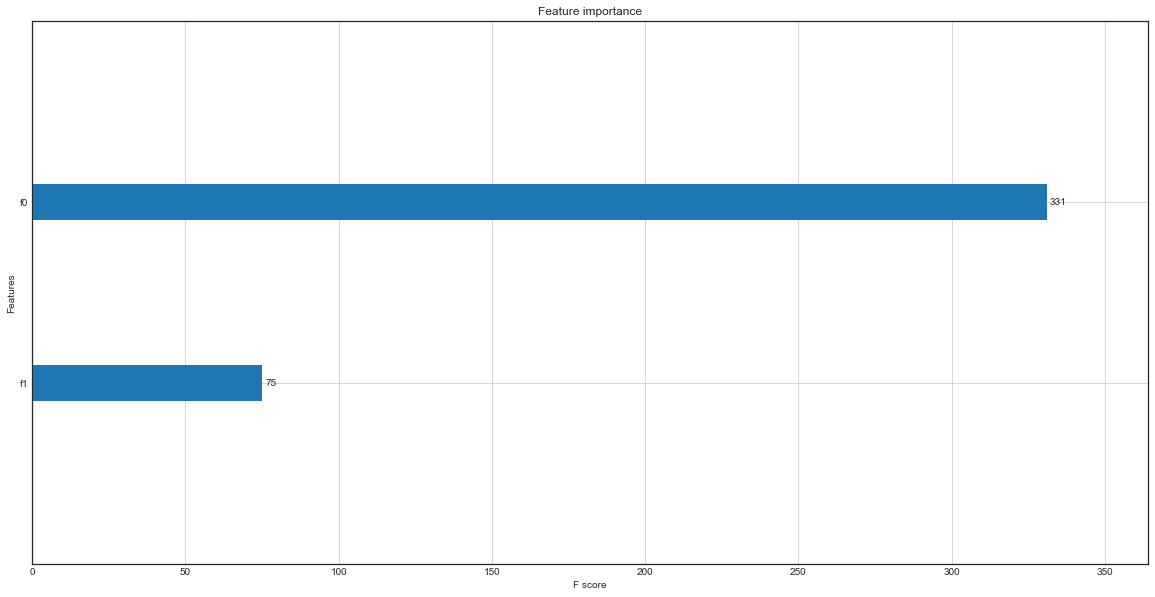

In [65]:
# xgboost classifier feature importance

plot_importance(xgb)
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(df['rand'], color='purple')
plt.ylabel('Values')
plt.title('Random Series')

plt.subplot(1, 2, 2)
plt.plot(df['rand_shift'], color='green')
plt.ylabel('Shifted Values')
plt.title('Shifted Series')
plt.show()

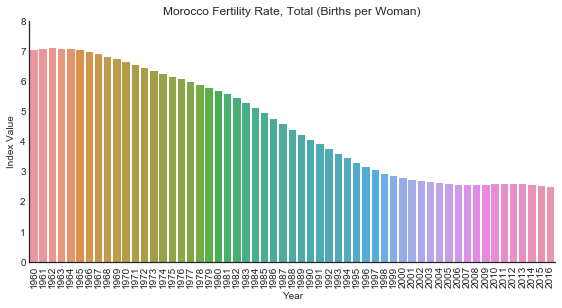

In [99]:
# Morocco fertility rate, total (births, per woman)

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=mor.loc[(mor.Indicator_Code == 'SP.DYN.TFRT.IN')],
                   kind='bar',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('Morocco Fertility Rate, Total (Births per Woman)')
plt.ylabel('Index Value')
plt.ylim(ymax=8.0)
plt.ylim(ymin=0);

In [102]:
mor.loc[(mor.Indicator_Code == 'SP.DYN.TFRT.IN')].describe()

,Index_Value
count,57.00
mean,4.56
std,1.75
min,2.49
25%,2.68
50%,4.39
75%,6.25
max,7.09


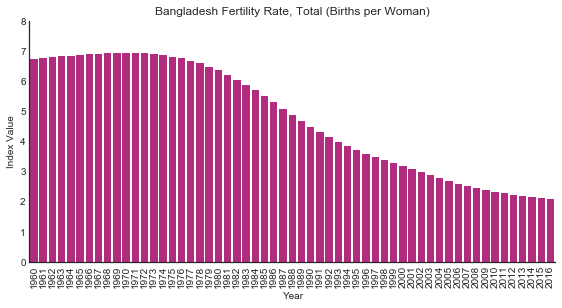

In [103]:
# Bangladesh fertility rate, total (births, per woman)

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=ban.loc[(ban.Indicator_Code == 'SP.DYN.TFRT.IN')],
                   kind='bar',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('Bangladesh Fertility Rate, Total (Births per Woman)')
plt.ylabel('Index Value')
plt.ylim(ymax=8.0)
plt.ylim(ymin=0);

In [104]:
ban.loc[(ban.Indicator_Code == 'SP.DYN.TFRT.IN')].describe()

,Index_Value
count,57.00
mean,4.80
std,1.85
min,2.10
25%,2.97
50%,4.89
75%,6.76
max,6.95


In [13]:
# create df of Canada data

can = pd.DataFrame(stats[stats.Country=='Canada'])

In [14]:
# create df of US data

us = pd.DataFrame(stats[stats.Country=='United States'])

Fertility rates for North America, specifically, Canada, the United States and Mexico will be analyzed to determine factors most strongly and directly affect fertility rates.  This information can be used to create policies to improve fertility rates for countries in decline, like the United States.  According to a [ThoughtCo.](https://www.thoughtco.com/total-fertility-rate-1435463) article, the fertility rate in the United States has declined below the replacement rate.  The replacement rate is the defined as the number of births per woman to maintain zero population growth.

## Which North American country has the highest fertility rate?  

As evidenced in the charts below, Mexico has the highest fertility rate with approximately 3 births per woman in 2016, the latest year for which data was available.  The United States is second at approximately 1.8 and Canada is third, at approximately 1.6 births per woman.

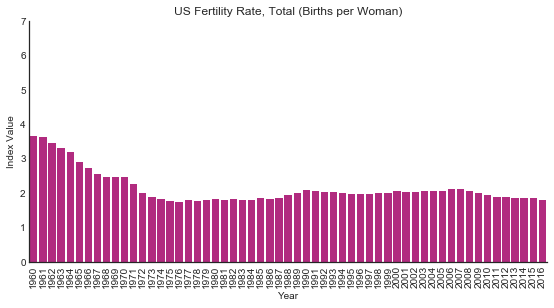

In [17]:
# US fertility rate, total (births, per woman)

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=us.loc[(us.Indicator_Code == 'SP.DYN.TFRT.IN')],
                   kind='bar',
                   color = 'mediumvioletred',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('US Fertility Rate, Total (Births per Woman)')
plt.ylabel('Index Value')
plt.ylim(ymax=7.0)
plt.ylim(ymin=0);

In [18]:
# fertility  drops & levels out post Roe V Wade (1973) and birth control

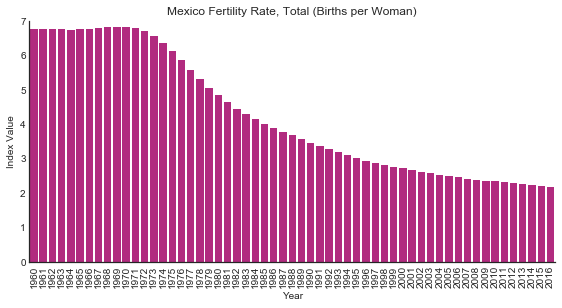

In [19]:
# Mexico fertility rate, total (births, per woman)

sns.factorplot(x='Year', 
                   y= 'Index_Value', 
                   data=mex.loc[(mex.Indicator_Code == 'SP.DYN.TFRT.IN')], 
                   kind='bar', 
                   color = 'mediumvioletred', 
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('Mexico Fertility Rate, Total (Births per Woman)')
plt.ylabel('Index Value')
plt.ylim(ymax=7.0)
plt.ylim(ymin=0);

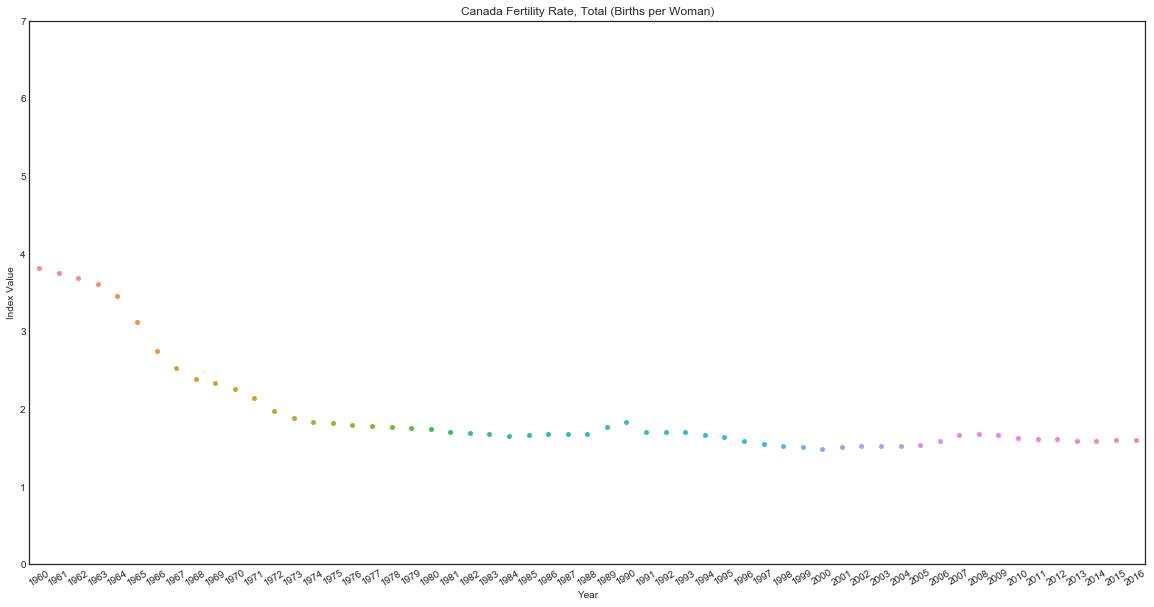

In [20]:
# Canada fertility rate, total (births, per woman)

sns.swarmplot(x='Year', y='Index_Value', data=can.loc[(can.Indicator_Code == 'SP.DYN.TFRT.IN')])
plt.xticks(rotation=30)
plt.title('Canada Fertility Rate, Total (Births per Woman)')
plt.ylabel('Index Value')
plt.ylim(ymax=7.0)
plt.ylim(ymin=0);

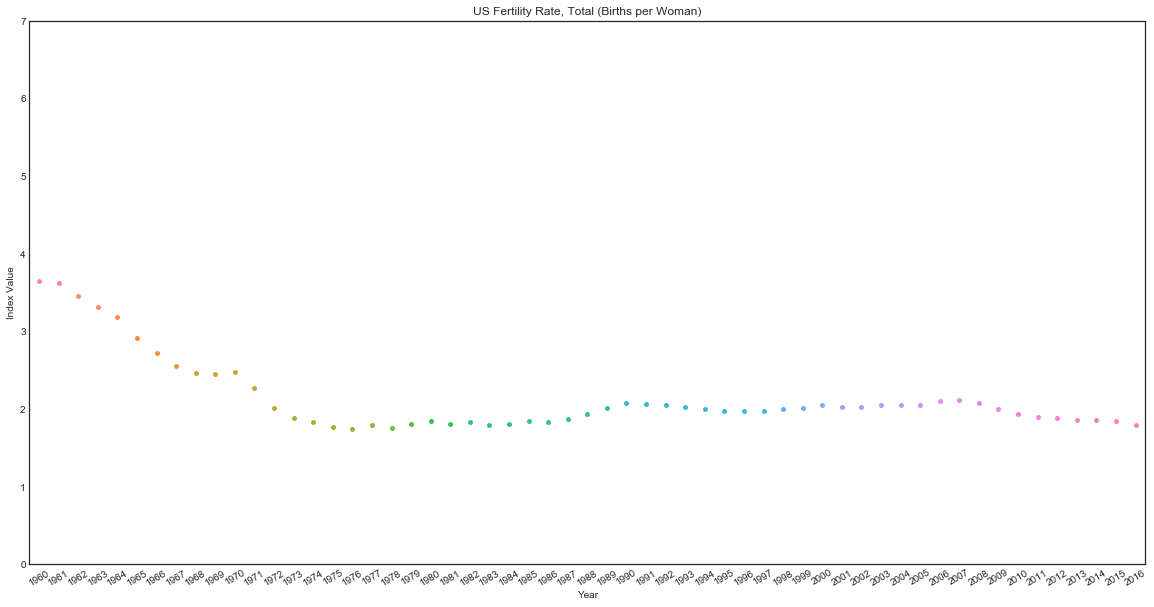

In [21]:
# US fertility rate, total (births, per woman)

sns.swarmplot(x='Year', y='Index_Value', data=us.loc[(us.Indicator_Code == 'SP.DYN.TFRT.IN')])
plt.xticks(rotation=30)
plt.title('US Fertility Rate, Total (Births per Woman)')
plt.ylabel('Index Value')
plt.ylim(ymax=7.0)
plt.ylim(ymin=0);

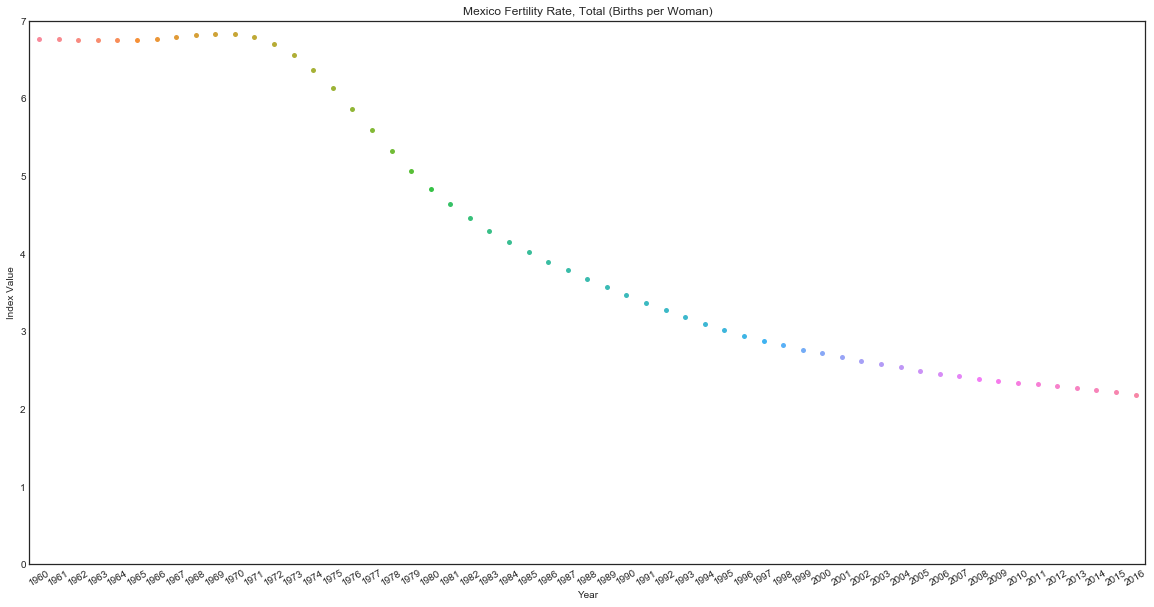

In [22]:
# Mexico fertility rate, total (births, per woman)

sns.swarmplot(x='Year', y='Index_Value', data=mex.loc[(mex.Indicator_Code == 'SP.DYN.TFRT.IN')])
plt.xticks(rotation=30)
plt.title('Mexico Fertility Rate, Total (Births per Woman)')
plt.ylabel('Index Value')
plt.ylim(ymax=7.0)
plt.ylim(ymin=0);

## How are fertility rates affecting population growth?  

With declining fertility rates, it is expected that population growth would decline accordngly.  However, using the fertility rate as the sole measure of population growth doesn't account for factors such as emigration and immigration. 

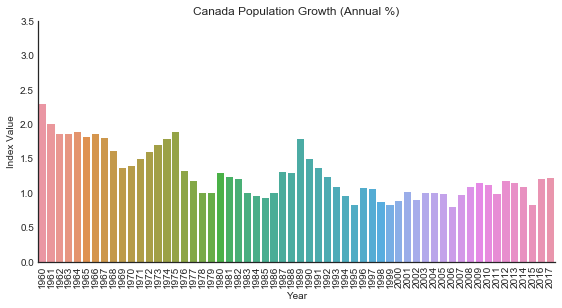

In [23]:
# Canada population growth (annual %)

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=can.loc[(can.Indicator_Code == 'SP.POP.GROW')],
                   kind='bar',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('Canada Population Growth (Annual %)')
plt.ylabel('Index Value')
plt.ylim(ymax=3.5)
plt.ylim(ymin=0);

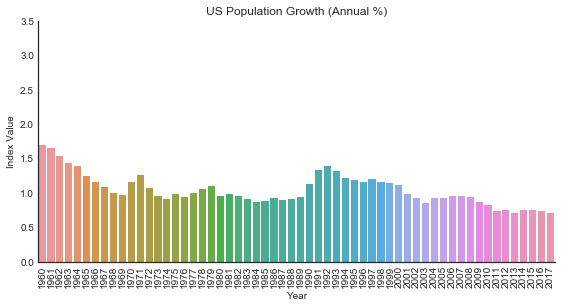

In [24]:
# US population growth (annual %)

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=us.loc[(us.Indicator_Code == 'SP.POP.GROW')],
                   kind='bar',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('US Population Growth (Annual %)')
plt.ylabel('Index Value')
plt.ylim(ymax=3.5)
plt.ylim(ymin=0);

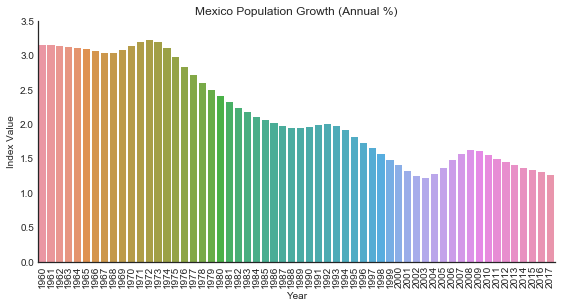

In [25]:
# Mexico population growth (annual %)

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=mex.loc[(mex.Indicator_Code == 'SP.POP.GROW')],
                   kind='bar',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('Mexico Population Growth (Annual %)')
plt.ylabel('Index Value')
plt.ylim(ymax=3.5)
plt.ylim(ymin=0);

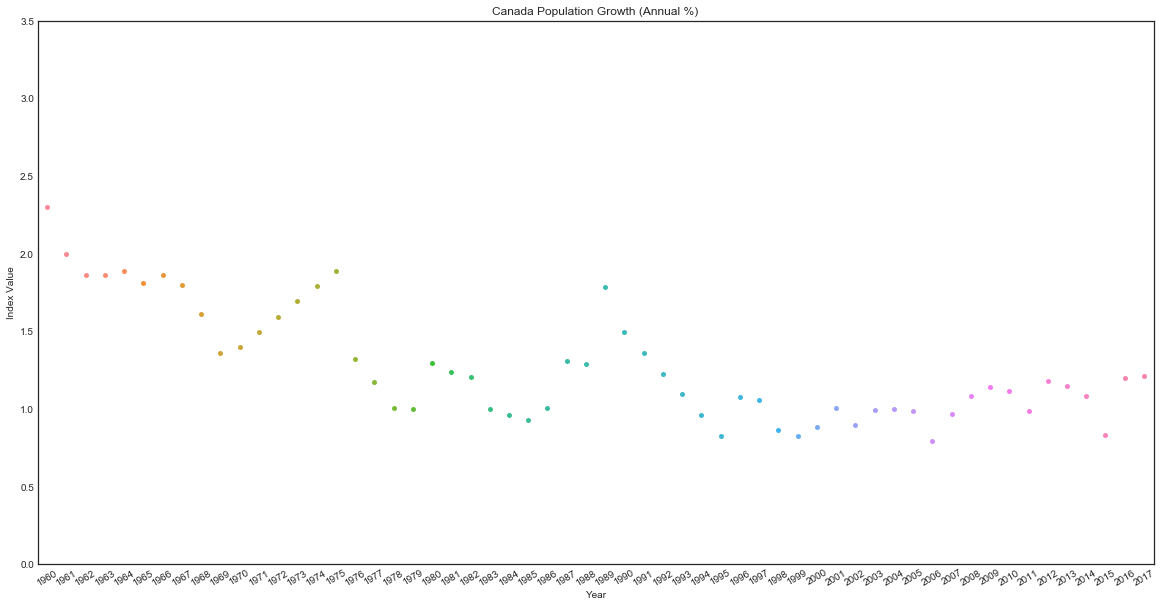

In [26]:
# Canada population growth (annual %)

sns.swarmplot(x='Year', y='Index_Value', data=can.loc[(can.Indicator_Code == 'SP.POP.GROW')])
plt.xticks(rotation=30)
plt.title('Canada Population Growth (Annual %)')
plt.ylabel('Index Value')
plt.ylim(ymax=3.5)
plt.ylim(ymin=0);

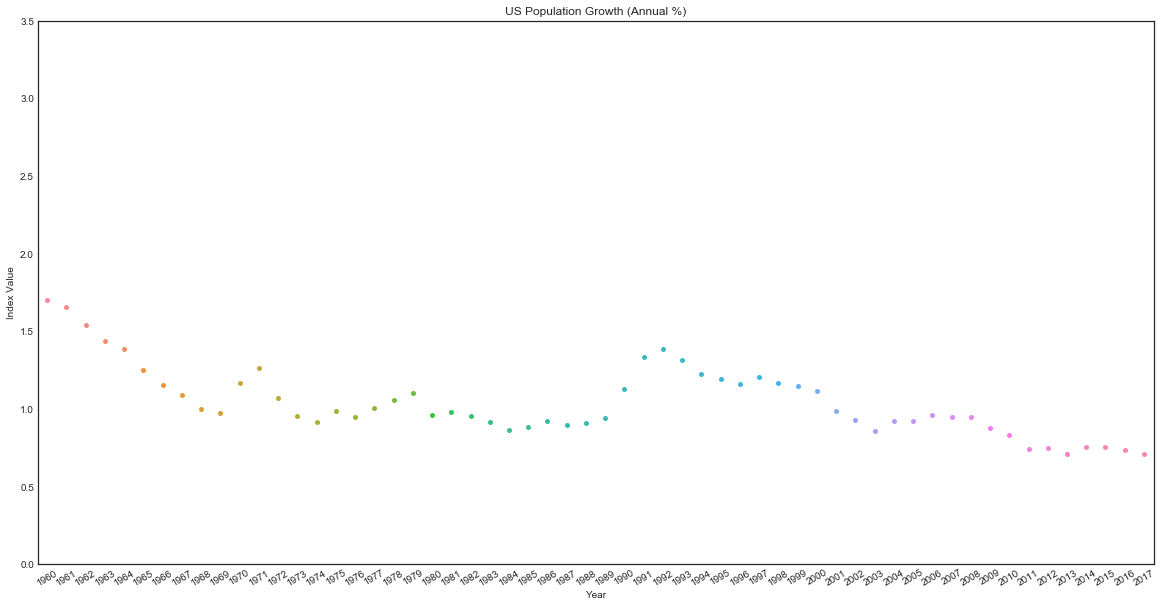

In [27]:
# US population growth (annual %)

sns.swarmplot(x='Year', y='Index_Value', data=us.loc[(us.Indicator_Code == 'SP.POP.GROW')])
plt.xticks(rotation=30)
plt.title('US Population Growth (Annual %)')
plt.ylabel('Index Value')
plt.ylim(ymax=3.5)
plt.ylim(ymin=0);

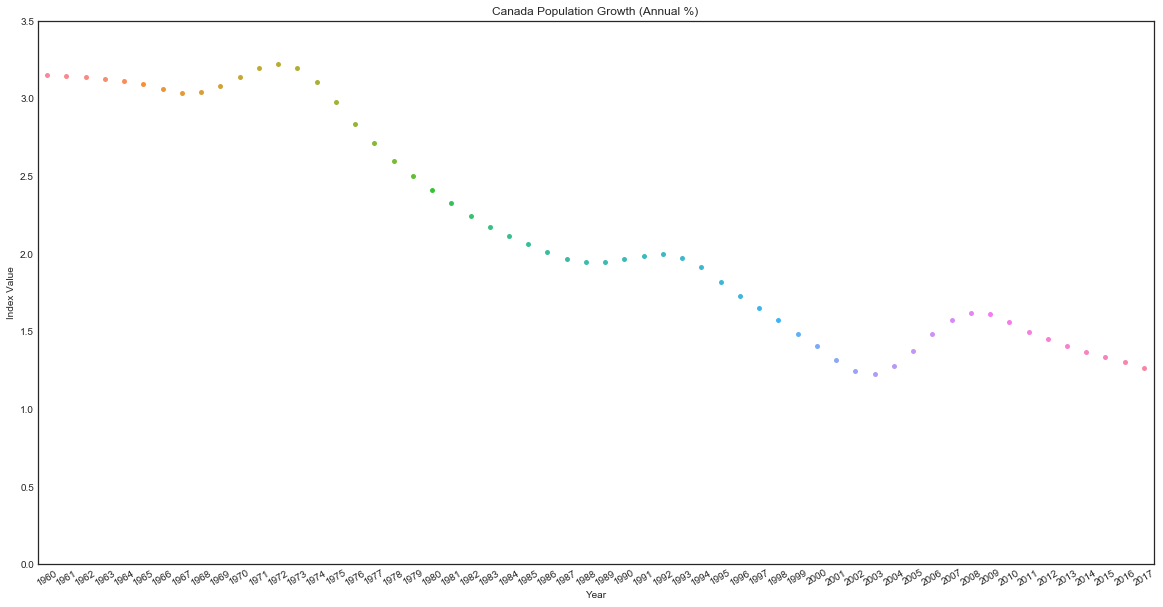

In [28]:
# Mexico population growth (annual %)

sns.swarmplot(x='Year', y='Index_Value', data=mex.loc[(mex.Indicator_Code == 'SP.POP.GROW')])
plt.xticks(rotation=30)
plt.title('Canada Population Growth (Annual %)')
plt.ylabel('Index Value')
plt.ylim(ymax=3.5)
plt.ylim(ymin=0);

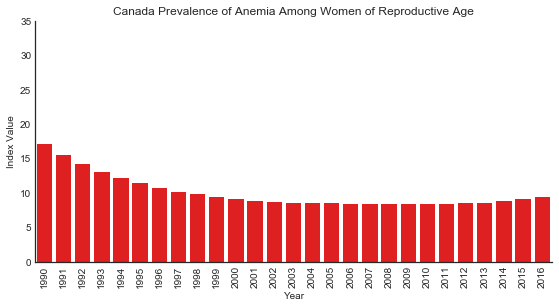

In [29]:
# Canada prevalence of anemia among women of reproductive age

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=can.loc[(can.Indicator_Code == 'SH.ANM.ALLW.ZS')],
                   kind='bar',
                   color = 'red',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('Canada Prevalence of Anemia Among Women of Reproductive Age')
plt.ylabel('Index Value')
plt.ylim(ymax=35.0)
plt.ylim(ymin=0);

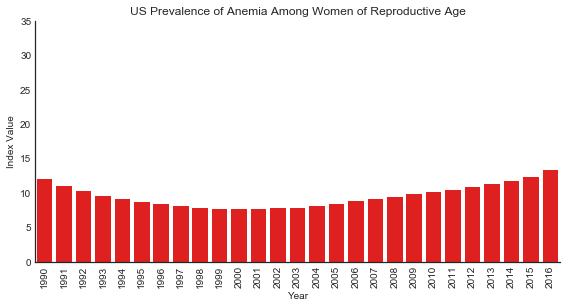

In [30]:
# US prevalence of anemia among women of reproductive age

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=us.loc[(us.Indicator_Code == 'SH.ANM.ALLW.ZS')],
                   kind='bar',
                   color = 'red',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('US Prevalence of Anemia Among Women of Reproductive Age')
plt.ylabel('Index Value')
plt.ylim(ymax=35.0)
plt.ylim(ymin=0);

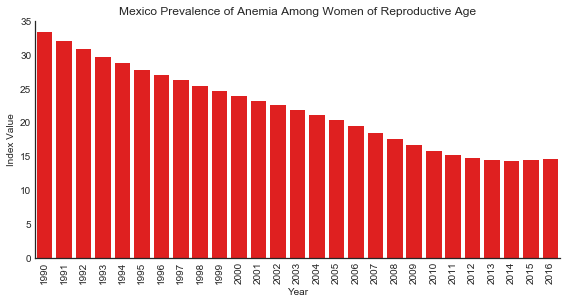

In [31]:
# Mexico prevalence of anemia among women of reproductive age

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=mex.loc[(mex.Indicator_Code == 'SH.ANM.ALLW.ZS')],
                   kind='bar',
                   color = 'red',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('Mexico Prevalence of Anemia Among Women of Reproductive Age')
plt.ylabel('Index Value')
plt.ylim(ymax=35.0)
plt.ylim(ymin=0);

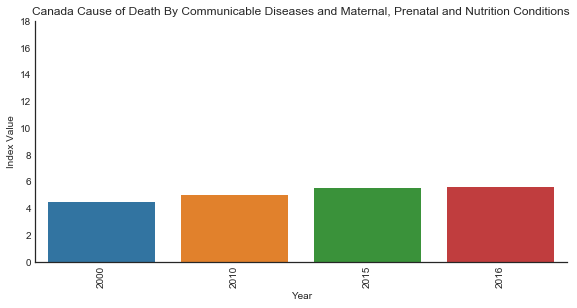

In [32]:
# Canada cause of death, by communicable diseases and maternal, prenatal and nutrition conditions

sns.factorplot(x='Year', 
                   y= 'Index_Value', 
                   data=can.loc[(can.Indicator_Code == 'SH.DTH.COMM.ZS')], 
                   kind='bar', 
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('Canada Cause of Death By Communicable Diseases and Maternal, Prenatal and Nutrition Conditions')
plt.ylabel('Index Value')
plt.ylim(ymax=18.0)
plt.ylim(ymin=0);

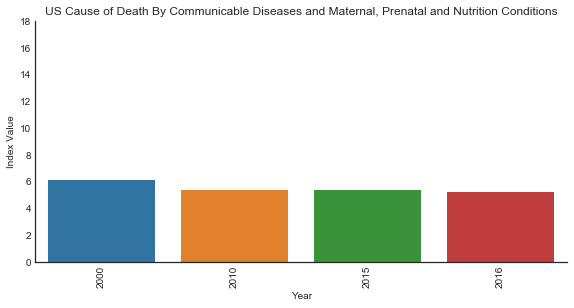

In [33]:
# US cause of death, by communicable diseases and maternal, prenatal and nutrition conditions

sns.factorplot(x='Year'
                   ,y= 'Index_Value'
                   ,data=us.loc[(us.Indicator_Code == 'SH.DTH.COMM.ZS')]
                   ,kind='bar'
                   ,aspect=2
                   )
plt.xticks(rotation=90)
plt.title('US Cause of Death By Communicable Diseases and Maternal, Prenatal and Nutrition Conditions')
plt.ylabel('Index Value')
plt.ylim(ymax=18.0)
plt.ylim(ymin=0);

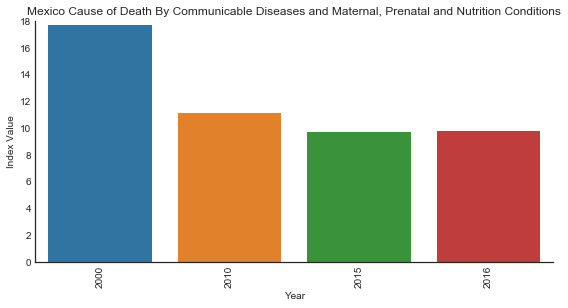

In [34]:
# Mexico cause of death, by communicable diseases and maternal, prenatal and nutrition conditions

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=mex.loc[(mex.Indicator_Code == 'SH.DTH.COMM.ZS')],
                   kind='bar',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('Mexico Cause of Death By Communicable Diseases and Maternal, Prenatal and Nutrition Conditions')
plt.ylabel('Index Value')
plt.ylim(ymax=18.0)
plt.ylim(ymin=0);

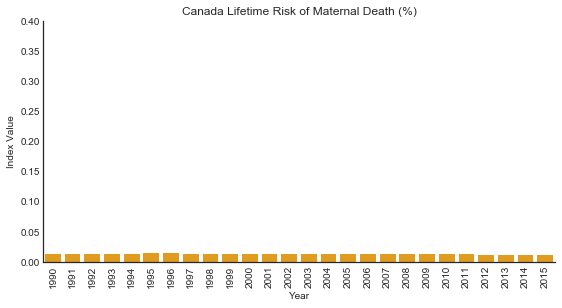

In [35]:
# Canada lifetime risk of maternal death (%)

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=can.loc[(can.Indicator_Code == 'SH.MMR.RISK.ZS')],
                   kind='bar',
                   color = 'orange',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('Canada Lifetime Risk of Maternal Death (%)')
plt.ylabel('Index Value')
plt.ylim(ymax=0.40)
plt.ylim(ymin=0);

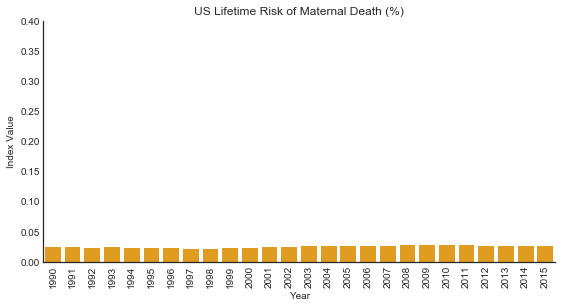

In [36]:
# US lifetime risk of maternal death (%)

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=us.loc[(us.Indicator_Code == 'SH.MMR.RISK.ZS')],
                   kind='bar',
                   color = 'orange',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('US Lifetime Risk of Maternal Death (%)')
plt.ylabel('Index Value')
plt.ylim(ymax=0.40)
plt.ylim(ymin=0);

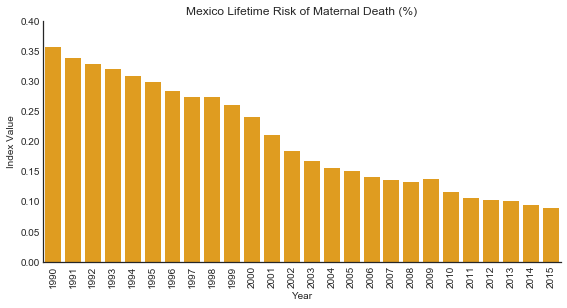

In [37]:
# Mexico lifetime risk of maternal death (%)

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=mex.loc[(mex.Indicator_Code == 'SH.MMR.RISK.ZS')],
                   kind='bar',
                   color = 'orange',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('Mexico Lifetime Risk of Maternal Death (%)')
plt.ylabel('Index Value')
plt.ylim(ymax=0.40)
plt.ylim(ymin=0);

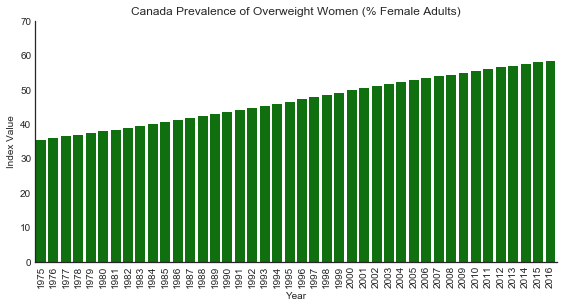

In [38]:
# Canada prevalence of overweight, female (% female adults)

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=can.loc[(can.Indicator_Code == 'SH.STA.OWAD.FE.ZS')],
                   kind='bar',
                   color = 'green',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('Canada Prevalence of Overweight Women (% Female Adults)')
plt.ylabel('Index Value')
plt.ylim(ymax=70.0)
plt.ylim(ymin=0);

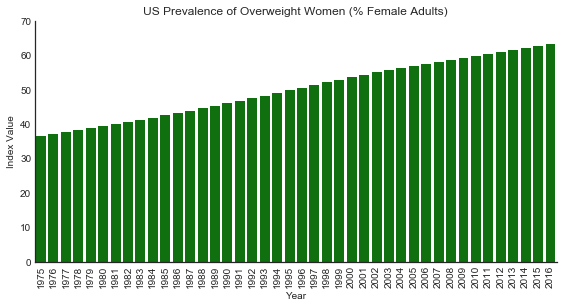

In [39]:
# US prevalence of overweight, female (% female adults)

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=us.loc[(us.Indicator_Code == 'SH.STA.OWAD.FE.ZS')],
                   kind='bar',
                   color = 'green',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('US Prevalence of Overweight Women (% Female Adults)')
plt.ylabel('Index Value')
plt.ylim(ymax=70.0)
plt.ylim(ymin=0);

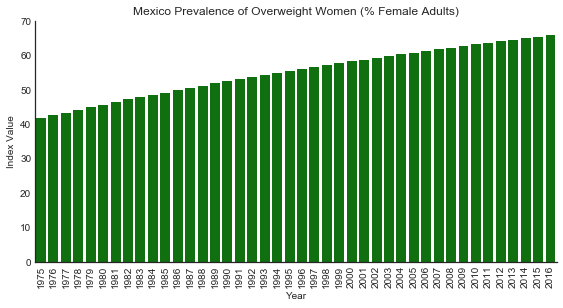

In [40]:
# Mexico prevalence of overweight, female (% female adults)

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=mex.loc[(mex.Indicator_Code == 'SH.STA.OWAD.FE.ZS')],
                   kind='bar',
                   color = 'green',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('Mexico Prevalence of Overweight Women (% Female Adults)')
plt.ylabel('Index Value')
plt.ylim(ymax=70.0)
plt.ylim(ymin=0);

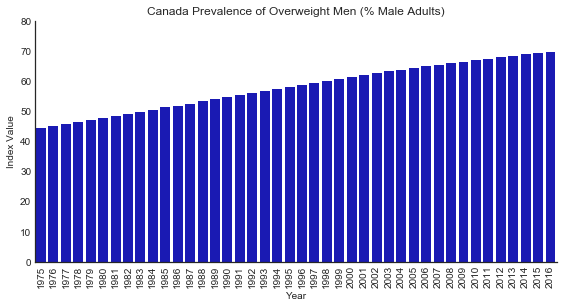

In [41]:
# US prevalence of overweight, male (% male adults)

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=can.loc[(can.Indicator_Code == 'SH.STA.OWAD.MA.ZS')],
                   kind='bar',
                   color = 'mediumblue',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('Canada Prevalence of Overweight Men (% Male Adults)')
plt.ylabel('Index Value')
plt.ylim(ymax=80.0)
plt.ylim(ymin=0);

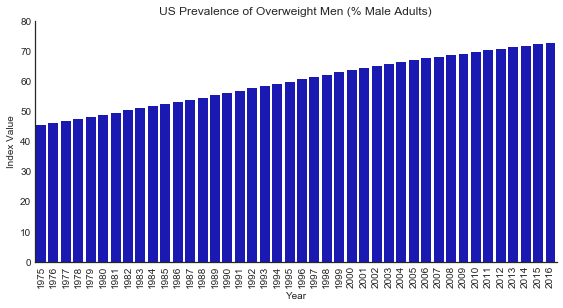

In [42]:
# US prevalence of overweight, male (% male adults)

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=us.loc[(us.Indicator_Code == 'SH.STA.OWAD.MA.ZS')],
                   kind='bar',
                   color = 'mediumblue',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('US Prevalence of Overweight Men (% Male Adults)')
plt.ylabel('Index Value')
plt.ylim(ymax=80.0)
plt.ylim(ymin=0);

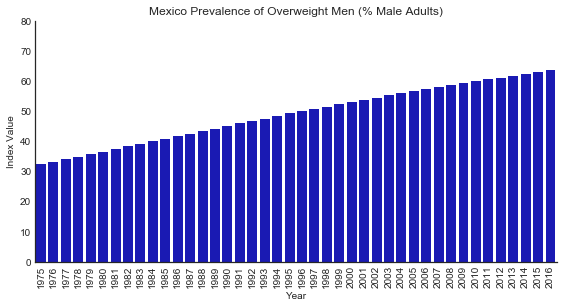

In [43]:
# Mexico prevalence of overweight, male (% male adults)

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=mex.loc[(mex.Indicator_Code == 'SH.STA.OWAD.MA.ZS')],
                   kind='bar',
                   color = 'mediumblue',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('Mexico Prevalence of Overweight Men (% Male Adults)')
plt.ylabel('Index Value')
plt.ylim(ymax=80.0)
plt.ylim(ymin=0);

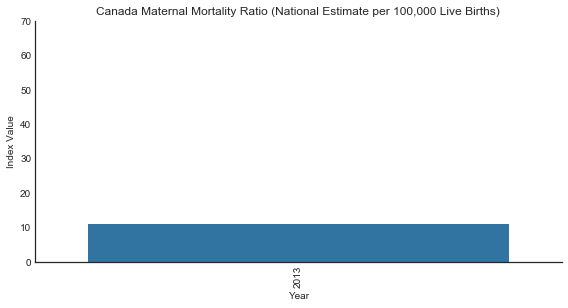

In [44]:
# Canada maternal mortality ratio (national estimate per 100,000 live births)

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=can.loc[(can.Indicator_Code == 'SH.STA.MMRT.NE')],
                   kind='bar',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('Canada Maternal Mortality Ratio (National Estimate per 100,000 Live Births)')
plt.ylabel('Index Value')
plt.ylim(ymax=70.0)
plt.ylim(ymin=0);

In [45]:
# select Canada to verify no additional data other than 2013

can[can['Indicator_Code'] =='SH.STA.MMRT.NE']

,Country,Country_Code,Indicator_Name,Indicator_Code,Year,Index_Value
754495,Canada,CAN,"Maternal mortality ratio (national estimate, p...",SH.STA.MMRT.NE,2013,11.00


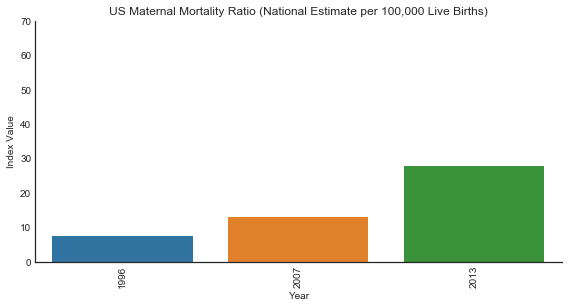

In [46]:
# US maternal mortality ratio (national estimate per 100,000 live births)

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=us.loc[(us.Indicator_Code == 'SH.STA.MMRT.NE')],
                   kind='bar',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('US Maternal Mortality Ratio (National Estimate per 100,000 Live Births)')
plt.ylabel('Index Value')
plt.ylim(ymax=70.0)
plt.ylim(ymin=0);

In [47]:
# select US to verify amount of data

us[us['Indicator_Code'] =='SH.STA.MMRT.NE']

,Country,Country_Code,Indicator_Name,Indicator_Code,Year,Index_Value
2595734,United States,USA,"Maternal mortality ratio (national estimate, p...",SH.STA.MMRT.NE,1996,7.60
2595735,United States,USA,"Maternal mortality ratio (national estimate, p...",SH.STA.MMRT.NE,2007,13.00
2595736,United States,USA,"Maternal mortality ratio (national estimate, p...",SH.STA.MMRT.NE,2013,28.00


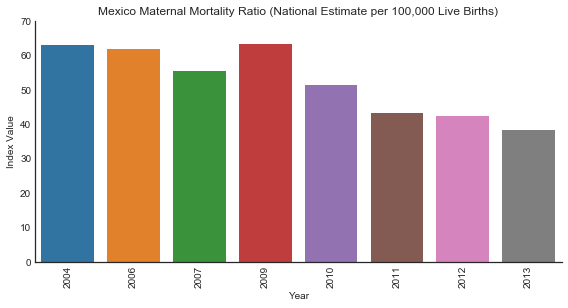

In [48]:
# Mexico maternal mortality ratio (national estimate per 100,000 live births)

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=mex.loc[(mex.Indicator_Code == 'SH.STA.MMRT.NE')],
                   kind='bar',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('Mexico Maternal Mortality Ratio (National Estimate per 100,000 Live Births)')
plt.ylabel('Index Value')
plt.ylim(ymax=70.0)
plt.ylim(ymin=0);

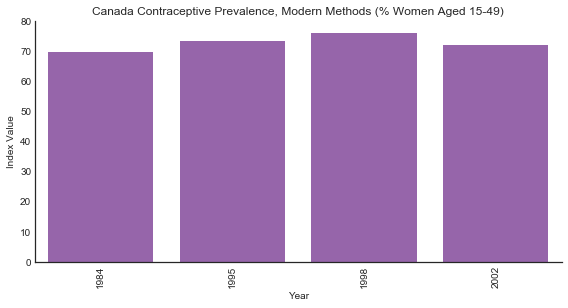

In [49]:
# Canada contraceptive prevalence, modern methods (% women ages 15-49)

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=can.loc[(can.Indicator_Code == 'SP.DYN.CONM.ZS')],
                   kind='bar',
                   color='#9b59b6',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('Canada Contraceptive Prevalence, Modern Methods (% Women Aged 15-49)')
plt.ylabel('Index Value')
plt.ylim(ymax=80.0)
plt.ylim(ymin=0);

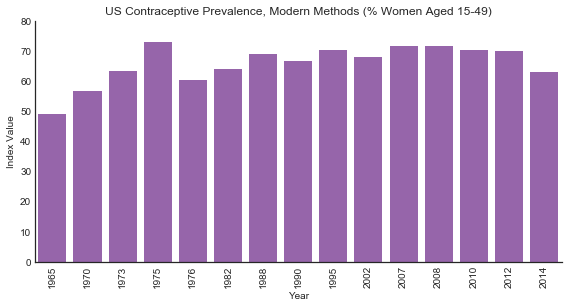

In [50]:
# US contraceptive prevalence, modern methods (% women ages 15-49)

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=us.loc[(us.Indicator_Code == 'SP.DYN.CONM.ZS')],
                   kind='bar',
                   color='#9b59b6',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('US Contraceptive Prevalence, Modern Methods (% Women Aged 15-49)')
plt.ylabel('Index Value')
plt.ylim(ymax=80.0)
plt.ylim(ymin=0);

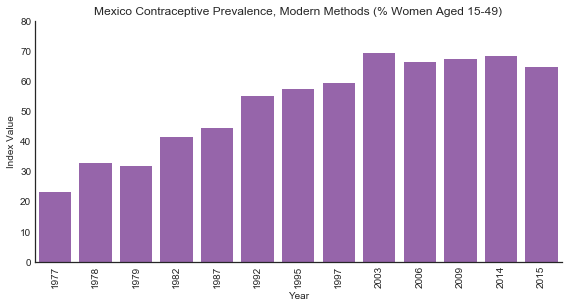

In [51]:
# Mexico contraceptive prevalence, modern methods (% women ages 15-49)

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=mex.loc[(mex.Indicator_Code == 'SP.DYN.CONM.ZS')],
                   kind='bar',
                   color='#9b59b6',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('Mexico Contraceptive Prevalence, Modern Methods (% Women Aged 15-49)')
plt.ylabel('Index Value')
plt.ylim(ymax=80.0)
plt.ylim(ymin=0);

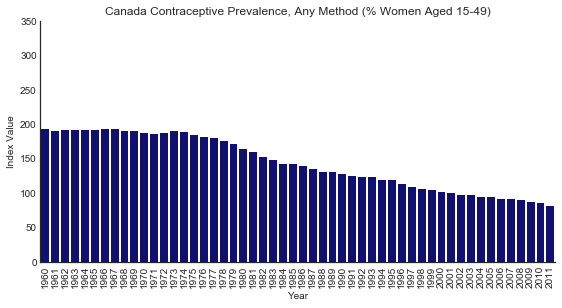

In [52]:
# Canada contraceptive prevalence, any methods (% women ages 15-49)

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=can.loc[(can.Indicator_Code == 'SP.DYN.AMRT.MA')],
                   kind='bar',
                   color='navy',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('Canada Contraceptive Prevalence, Any Method (% Women Aged 15-49)')
plt.ylabel('Index Value')
plt.ylim(ymax=350.0)
plt.ylim(ymin=0);

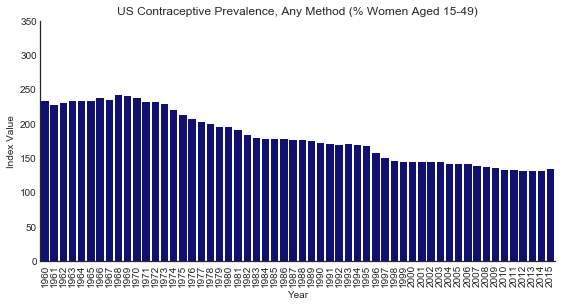

In [53]:
# US contraceptive prevalence, any methods (% women ages 15-49)

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=us.loc[(us.Indicator_Code == 'SP.DYN.AMRT.MA')],
                   kind='bar',
                   color='navy',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('US Contraceptive Prevalence, Any Method (% Women Aged 15-49)')
plt.ylabel('Index Value')
plt.ylim(ymax=350.0)
plt.ylim(ymin=0);

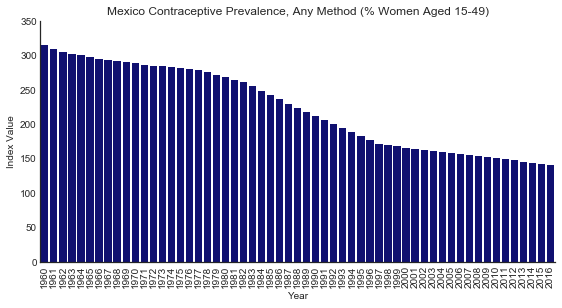

In [54]:
# Mexico contraceptive prevalence, any methods (% women ages 15-49)

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=mex.loc[(mex.Indicator_Code == 'SP.DYN.AMRT.MA')],
                   kind='bar',
                   color='navy',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('Mexico Contraceptive Prevalence, Any Method (% Women Aged 15-49)')
plt.ylabel('Index Value')
plt.ylim(ymax=350.0)
plt.ylim(ymin=0);

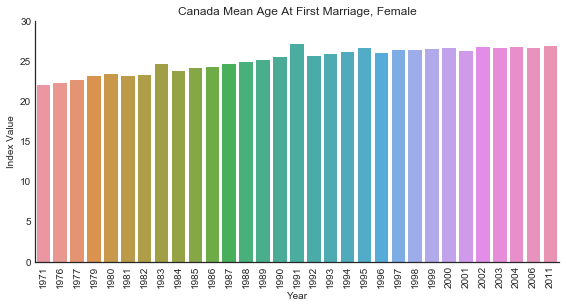

In [55]:
# Canada mean age at first marriage, female

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=can.loc[(can.Indicator_Code == 'SP.DYN.SMAM.FE')],
                   kind='bar',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('Canada Mean Age At First Marriage, Female')
plt.ylabel('Index Value')
plt.ylim(ymax=30.0)
plt.ylim(ymin=0);

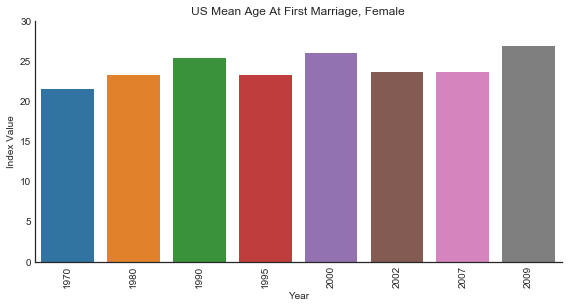

In [56]:
# US mean age at first marriage, female

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=us.loc[(us.Indicator_Code == 'SP.DYN.SMAM.FE')],
                   kind='bar',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('US Mean Age At First Marriage, Female')
plt.ylabel('Index Value')
plt.ylim(ymax=30.0)
plt.ylim(ymin=0);

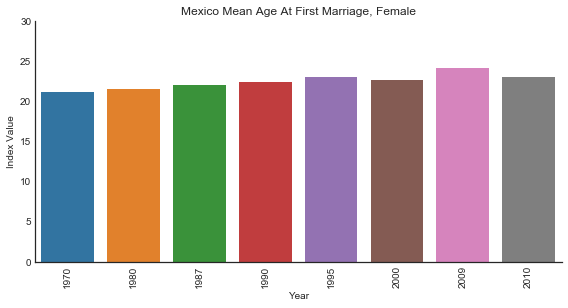

In [57]:
# Mexico mean age at first marriage, female

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=mex.loc[(mex.Indicator_Code == 'SP.DYN.SMAM.FE')],
                   kind='bar',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('Mexico Mean Age At First Marriage, Female')
plt.ylabel('Index Value')
plt.ylim(ymax=30.0)
plt.ylim(ymin=0);

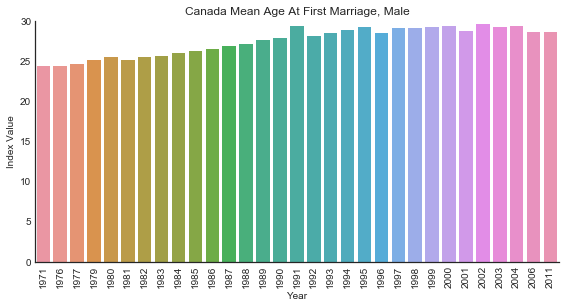

In [58]:
# Canada mean age at first marriage, male

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=can.loc[(can.Indicator_Code == 'SP.DYN.SMAM.MA')],
                   kind='bar',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('Canada Mean Age At First Marriage, Male')
plt.ylabel('Index Value')
plt.ylim(ymax=30.0)
plt.ylim(ymin=0);

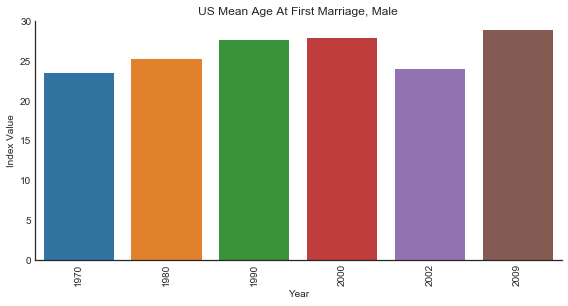

In [59]:
# US mean age at first marriage, male

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=us.loc[(us.Indicator_Code == 'SP.DYN.SMAM.MA')],
                   kind='bar',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('US Mean Age At First Marriage, Male')
plt.ylabel('Index Value')
plt.ylim(ymax=30.0)
plt.ylim(ymin=0);

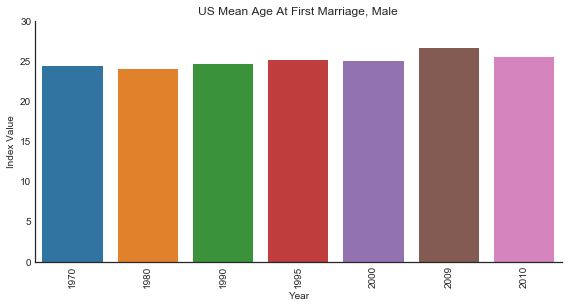

In [60]:
# Mexico mean age at first marriage, male

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=mex.loc[(mex.Indicator_Code == 'SP.DYN.SMAM.MA')],
                   kind='bar',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('US Mean Age At First Marriage, Male')
plt.ylabel('Index Value')
plt.ylim(ymax=30.0)
plt.ylim(ymin=0);

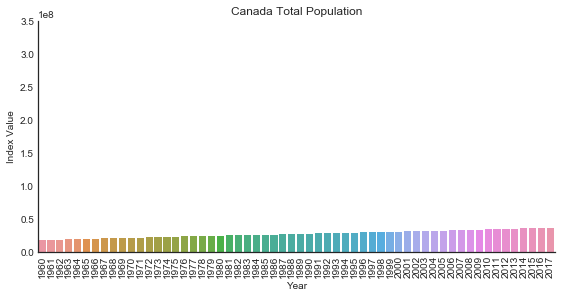

In [61]:
# Canada total population

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=can.loc[(can.Indicator_Code == 'SP.POP.TOTL')],
                   kind='bar',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('Canada Total Population')
plt.ylabel('Index Value')
plt.ylim(ymax=350000000.0)
plt.ylim(ymin=0);

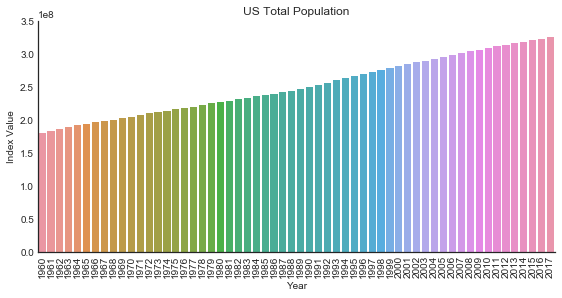

In [62]:
# US total population

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=us.loc[(us.Indicator_Code == 'SP.POP.TOTL')],
                   kind='bar',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('US Total Population')
plt.ylabel('Index Value')
plt.ylim(ymax=350000000.0)
plt.ylim(ymin=0);

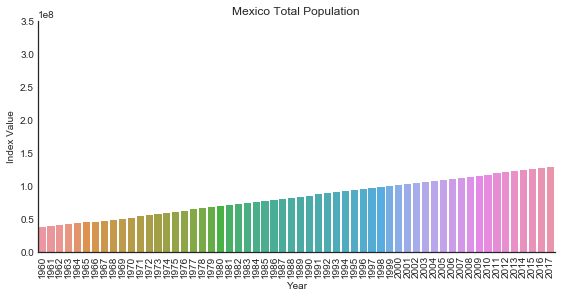

In [63]:
# Mexico total population

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=mex.loc[(mex.Indicator_Code == 'SP.POP.TOTL')],
                   kind='bar',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('Mexico Total Population')
plt.ylabel('Index Value')
plt.ylim(ymax=350000000.0)
plt.ylim(ymin=0);

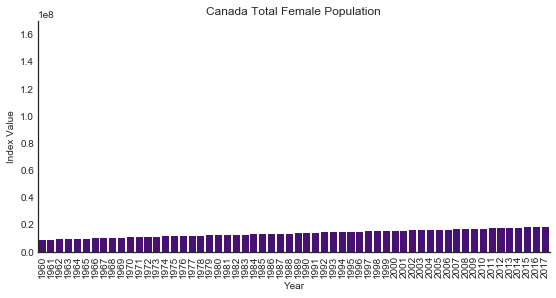

In [64]:
# US total female population

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=can.loc[(can.Indicator_Code == 'SP.POP.TOTL.FE.IN')],
                   kind='bar',
                   color='indigo',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('Canada Total Female Population')
plt.ylabel('Index Value')
plt.ylim(ymax=170000000.0)
plt.ylim(ymin=0);

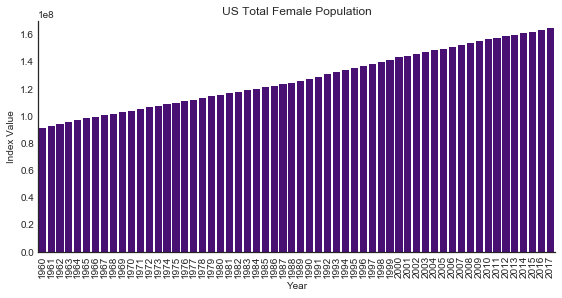

In [65]:
# US total female population

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=us.loc[(us.Indicator_Code == 'SP.POP.TOTL.FE.IN')],
                   kind='bar',
                   color='indigo',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('US Total Female Population')
plt.ylabel('Index Value')
plt.ylim(ymax=170000000.0)
plt.ylim(ymin=0);

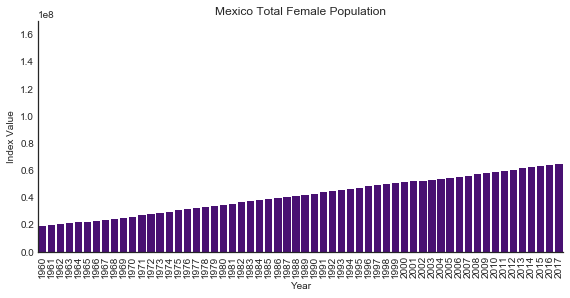

In [66]:
# Mexico total female population

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=mex.loc[(mex.Indicator_Code == 'SP.POP.TOTL.FE.IN')],
                   kind='bar',
                   color='indigo',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('Mexico Total Female Population')
plt.ylabel('Index Value')
plt.ylim(ymax=170000000.0)
plt.ylim(ymin=0);

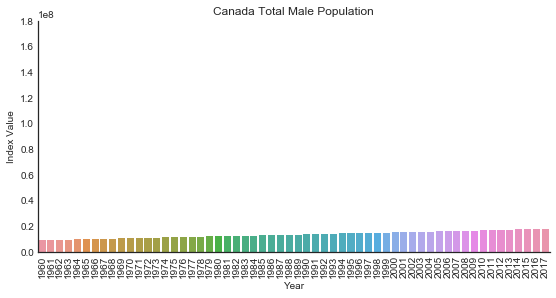

In [67]:
# Canada total male population 

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=can.loc[(can.Indicator_Code == 'SP.POP.TOTL.MA.IN')],
                   kind='bar',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('Canada Total Male Population')
plt.ylabel('Index Value')
plt.ylim(ymax=180000000.0)
plt.ylim(ymin=0);

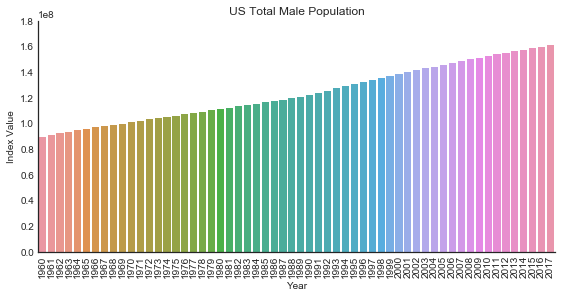

In [68]:
# US total male population 

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=us.loc[(us.Indicator_Code == 'SP.POP.TOTL.MA.IN')],
                   kind='bar',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('US Total Male Population')
plt.ylabel('Index Value')
plt.ylim(ymax=180000000.0)
plt.ylim(ymin=0);

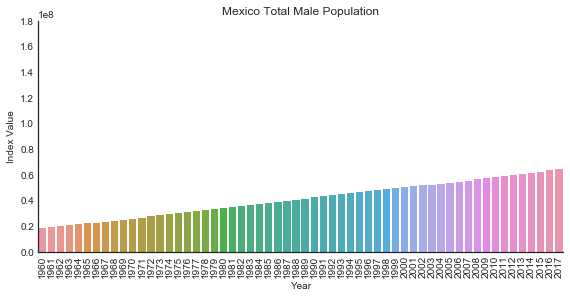

In [69]:
# Mexico total male population

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=mex.loc[(mex.Indicator_Code == 'SP.POP.TOTL.MA.IN')],
                   kind='bar',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('Mexico Total Male Population')
plt.ylabel('Index Value')
plt.ylim(ymax=180000000.0)
plt.ylim(ymin=0);

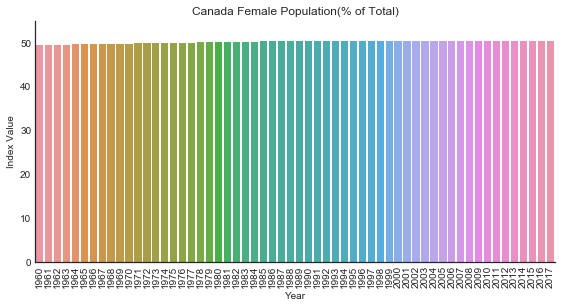

In [70]:
# Canada population, female (% of total)

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=can.loc[(can.Indicator_Code == 'SP.POP.TOTL.FE.ZS')],
                   kind='bar',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('Canada Female Population(% of Total)')
plt.ylabel('Index Value')
plt.ylim(ymax=55.0)
plt.ylim(ymin=0);

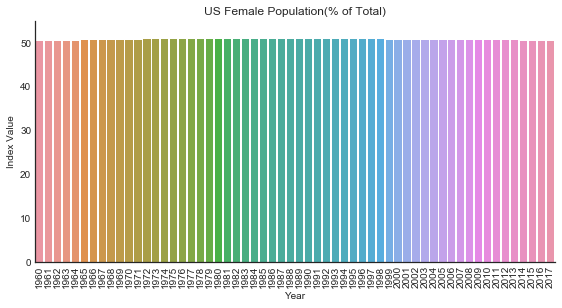

In [71]:
# US population, female (% of total)

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=us.loc[(us.Indicator_Code == 'SP.POP.TOTL.FE.ZS')],
                   kind='bar',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('US Female Population(% of Total)')
plt.ylabel('Index Value')
plt.ylim(ymax=55.0)
plt.ylim(ymin=0);

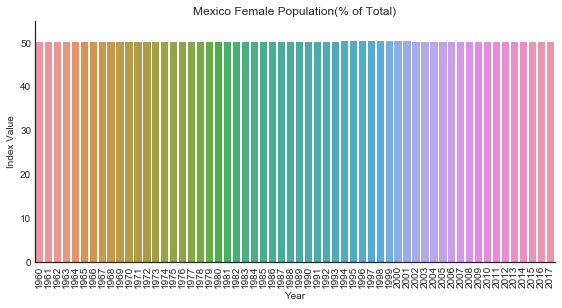

In [72]:
# Mexico population, female (% of total)

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=mex.loc[(mex.Indicator_Code == 'SP.POP.TOTL.FE.ZS')],
                   kind='bar',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('Mexico Female Population(% of Total)')
plt.ylabel('Index Value')
plt.ylim(ymax=55.0)
plt.ylim(ymin=0);

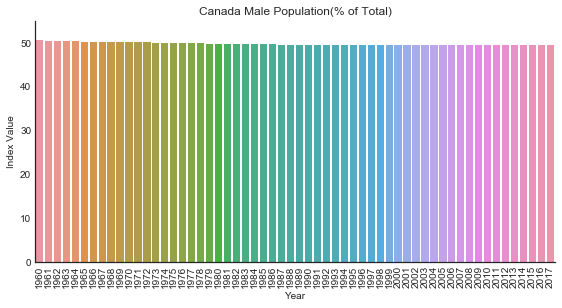

In [73]:
# Canada population, female (% of total)

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=can.loc[(can.Indicator_Code == 'SP.POP.TOTL.MA.ZS')],
                   kind='bar',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('Canada Male Population(% of Total)')
plt.ylabel('Index Value')
plt.ylim(ymax=55.0)
plt.ylim(ymin=0);

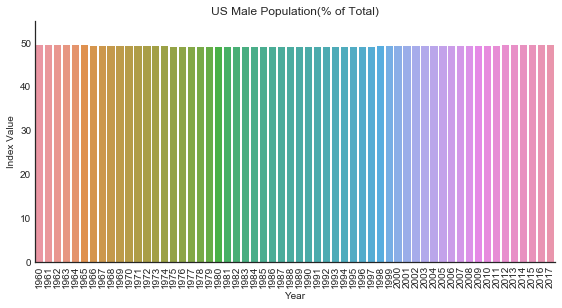

In [74]:
# US population, male (% of total)

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=us.loc[(us.Indicator_Code == 'SP.POP.TOTL.MA.ZS')],
                   kind='bar',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('US Male Population(% of Total)')
plt.ylabel('Index Value')
plt.ylim(ymax=55.0)
plt.ylim(ymin=0);

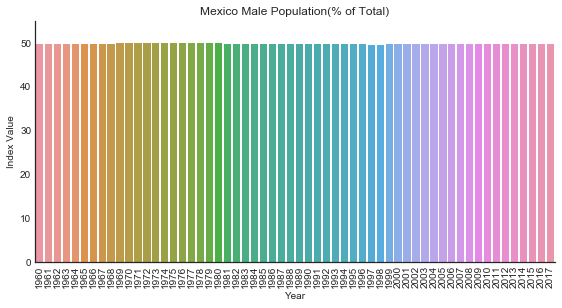

In [75]:
# Mexico population, male (% of total)

sns.factorplot(x='Year',
                   y= 'Index_Value',
                   data=mex.loc[(mex.Indicator_Code == 'SP.POP.TOTL.MA.ZS')],
                   kind='bar',
                   aspect=2
                   )
plt.xticks(rotation=90)
plt.title('Mexico Male Population(% of Total)')
plt.ylabel('Index Value')
plt.ylim(ymax=55.0)
plt.ylim(ymin=0);

In [76]:
# based on population stats, women outnumber men in North America, graphs back this up

In [16]:
# combine individual country dataframes & set column names

north_am = pd.concat([can, us, mex], axis=0, ignore_index=True)
stats.columns = north_am.columns

In [17]:
# verify column names and data

north_am.head()

,Country,Country_Code,Indicator_Name,Indicator_Code,Year,Index_Value
0,Canada,CAN,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,55.62
1,Canada,CAN,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1961,54.85
2,Canada,CAN,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1962,54.08
3,Canada,CAN,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1963,52.28
4,Canada,CAN,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1964,50.48


In [79]:
# indicator codes of interest (plotted above)

# 'SP.POP.TOTL.MA.ZS', 'SP.POP.TOTL.FE.ZS', 'SP.POP.TOTL.MA.IN', 'SP.POP.TOTL.FE.IN', 'SP.POP.TOTL', 'SP.DYN.SMAM.MA',
# 'SP.DYN.SMAM.FE', 'SP.DYN.AMRT.MA', 'SP.DYN.CONM.ZS', 'SH.STA.MMRT.NE', 'SH.STA.OWAD.MA.ZS', 'SH.STA.OWAD.FE.ZS',
# 'SH.MMR.RISK.ZS', 'SH.DTH.COMM.ZS', 'SH.ANM.ALLW.ZS', 'SP.POP.GROW', 'SP.DYN.TFRT.IN'

In [18]:
# get dummies for North America

features = pd.get_dummies(north_am[['Country_Code', 'Indicator_Code', 'Year', 'Index_Value']])

In [19]:
features.shape

(36694, 426)

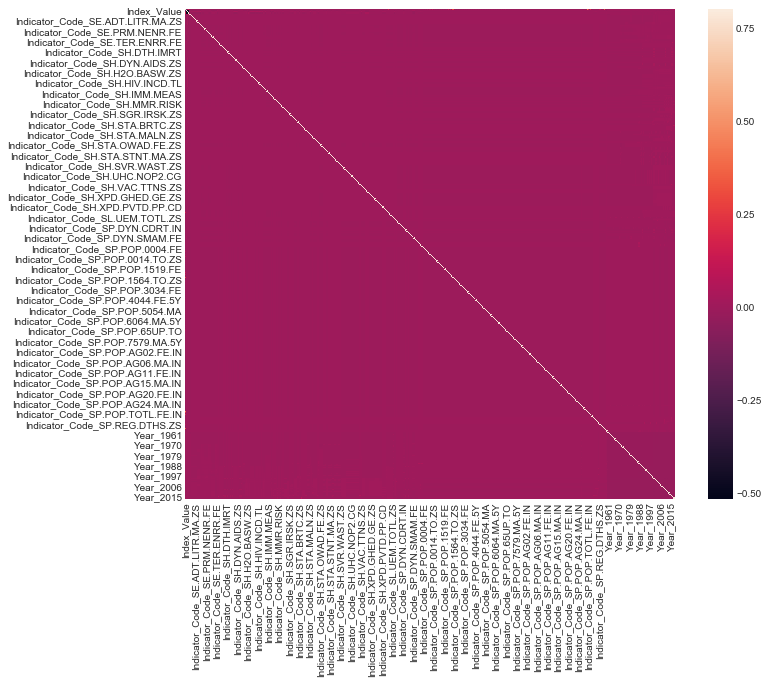

In [19]:
# index value is the only numeric column

corrmat = features.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [21]:
features.corr()

,Index_Value,Country_Code_CAN,Country_Code_MEX,Country_Code_USA,Indicator_Code_NY.GNP.PCAP.CD,Indicator_Code_SE.ADT.1524.LT.FM.ZS,Indicator_Code_SE.ADT.1524.LT.MA.ZS,Indicator_Code_SE.ADT.1524.LT.ZS,Indicator_Code_SE.ADT.LITR.FE.ZS,Indicator_Code_SE.ADT.LITR.MA.ZS,...,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017
Index_Value,1.00,-0.11,-0.05,0.16,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00,...,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02
Country_Code_CAN,-0.11,1.00,-0.50,-0.48,0.00,-0.01,-0.01,-0.01,-0.01,-0.01,...,-0.01,-0.01,-0.00,-0.01,-0.01,-0.01,-0.01,-0.01,0.00,0.00
Country_Code_MEX,-0.05,-0.50,1.00,-0.52,-0.00,0.03,0.03,0.03,0.03,0.03,...,0.01,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.00,-0.00
Country_Code_USA,0.16,-0.48,-0.52,1.00,0.00,-0.01,-0.01,-0.01,-0.01,-0.01,...,0.00,0.01,0.00,0.00,0.00,0.00,0.00,-0.01,-0.01,-0.00
Indicator_Code_NY.GNP.PCAP.CD,-0.01,0.00,-0.00,0.00,1.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00
Indicator_Code_SE.ADT.1524.LT.FM.ZS,-0.00,-0.01,0.03,-0.01,-0.00,1.00,-0.00,-0.00,-0.00,-0.00,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,-0.00,-0.00
Indicator_Code_SE.ADT.1524.LT.MA.ZS,-0.00,-0.01,0.03,-0.01,-0.00,-0.00,1.00,-0.00,-0.00,-0.00,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,-0.00,-0.00
Indicator_Code_SE.ADT.1524.LT.ZS,-0.00,-0.01,0.03,-0.01,-0.00,-0.00,-0.00,1.00,-0.00,-0.00,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,-0.00,-0.00
Indicator_Code_SE.ADT.LITR.FE.ZS,-0.00,-0.01,0.03,-0.01,-0.00,-0.00,-0.00,-0.00,1.00,-0.00,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,-0.00,-0.00
Indicator_Code_SE.ADT.LITR.MA.ZS,-0.00,-0.01,0.03,-0.01,-0.00,-0.00,-0.00,-0.00,-0.00,1.00,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,-0.00,-0.00


In [19]:
from sklearn.model_selection import train_test_split

X = features.drop(['Indicator_Code_SP.DYN.TFRT.IN', 'Indicator_Code_NY.GNP.PCAP.CD', 
                   'Indicator_Code_SE.ADT.1524.LT.FM.ZS', 'Indicator_Code_SE.ADT.1524.LT.MA.ZS', 
                  'Indicator_Code_SE.ADT.1524.LT.ZS', 'Indicator_Code_SE.ADT.LITR.FE.ZS', 
                   'Indicator_Code_SE.ADT.LITR.MA.ZS', 'Indicator_Code_SP.POP.TOTL.MA.ZS', 
                   'Indicator_Code_SP.POP.TOTL.FE.ZS', 'Indicator_Code_SP.POP.TOTL.MA.IN', 
                   'Indicator_Code_SP.POP.TOTL.FE.IN', 'Indicator_Code_SP.POP.TOTL', 'Indicator_Code_SP.DYN.SMAM.MA', 
                   'Indicator_Code_SP.DYN.SMAM.FE', 'Indicator_Code_SP.DYN.AMRT.MA', 'Indicator_Code_SP.DYN.CONM.ZS', 
                   'Indicator_Code_SH.STA.MMRT.NE', 'Indicator_Code_SH.STA.OWAD.MA.ZS', 
                   'Indicator_Code_SH.STA.OWAD.FE.ZS', 'Indicator_Code_SH.MMR.RISK.ZS', 
                   'Indicator_Code_SH.DTH.COMM.ZS', 'Indicator_Code_SH.ANM.ALLW.ZS', 'Indicator_Code_SP.POP.GROW'], 1)

y = features[('Indicator_Code_SP.DYN.TFRT.IN')]

# Divide into training and test sets

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42)

In [20]:
# random forest classifier

from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train, y_train)

cross_val_score(rfc, X_test, y_test, cv=10)

array([ 0.99546279,  0.99274047,  0.99455041,  0.99636694,  0.99636694,
        0.99273388,  0.99364214,  0.99636364,  0.99545455,  0.99545455])

In [21]:
from sklearn.metrics import recall_score

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))

	Recall: 0.214


In [87]:
# 26% recall is horrible!!

# The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. 
# The recall is intuitively the ability of the classifier to find all the positive samples

Feature ranking:
1. feature 0 (0.621192)
2. feature 271 (0.023649)
3. feature 275 (0.018180)
4. feature 2 (0.015236)
5. feature 269 (0.013591)
6. feature 339 (0.010827)
7. feature 341 (0.010166)
8. feature 3 (0.009268)
9. feature 68 (0.009054)
10. feature 273 (0.008391)
11. feature 255 (0.008054)
12. feature 1 (0.007478)
13. feature 351 (0.006566)
14. feature 349 (0.006114)
15. feature 346 (0.005678)
16. feature 345 (0.005656)
17. feature 267 (0.005441)
18. feature 357 (0.005355)
19. feature 257 (0.005331)
20. feature 253 (0.005249)
21. feature 393 (0.004907)
22. feature 350 (0.004807)
23. feature 251 (0.004540)
24. feature 378 (0.004406)
25. feature 265 (0.004219)
26. feature 247 (0.004182)
27. feature 361 (0.003805)
28. feature 127 (0.003657)
29. feature 376 (0.003601)
30. feature 396 (0.003588)
31. feature 353 (0.003538)
32. feature 365 (0.003492)
33. feature 348 (0.003362)
34. feature 356 (0.003341)
35. feature 355 (0.003336)
36. feature 383 (0.003305)
37. feature 237 (0.003076)
38

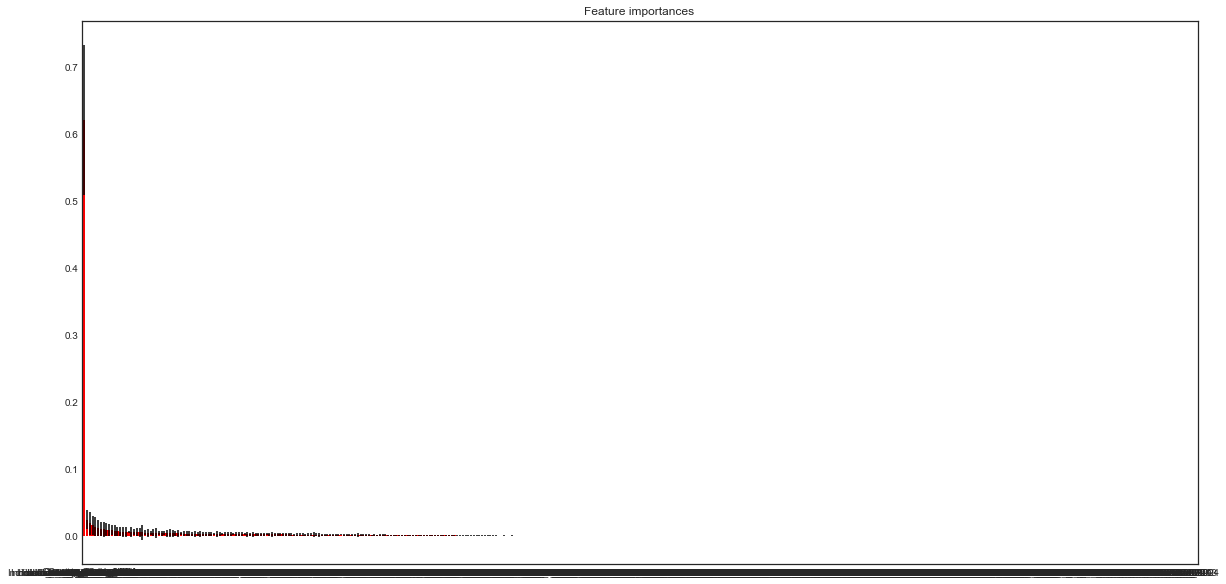

In [24]:
# calculate & plot feature importance

importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

feature_names = features.columns # e.g. ['A', 'B', 'C', 'D', 'E']
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
#plt.xticks(range(X_train.shape[1]), indices)
plt.xticks(range(X_train.shape[1]), feature_names)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [23]:
# support vector machine classifier

from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
# svc cross validation

cross_val_score(svc, X_test, y_test, cv=10)

array([ 0.99546279,  0.99546279,  0.99636694,  0.99636694,  0.99636694,
        0.99636694,  0.99636694,  0.99636364,  0.99636364,  0.99636364])

In [25]:
# overfitting? check recall instead
# why is recall 0??

#svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))

	Recall: 0.000


[0]	validation_0-error:0.003815
Will train until validation_0-error hasn't improved in 5 rounds.
[1]	validation_0-error:0.003815
[2]	validation_0-error:0.003815
[3]	validation_0-error:0.003815
[4]	validation_0-error:0.003815
[5]	validation_0-error:0.003815
Stopping. Best iteration:
[0]	validation_0-error:0.003815



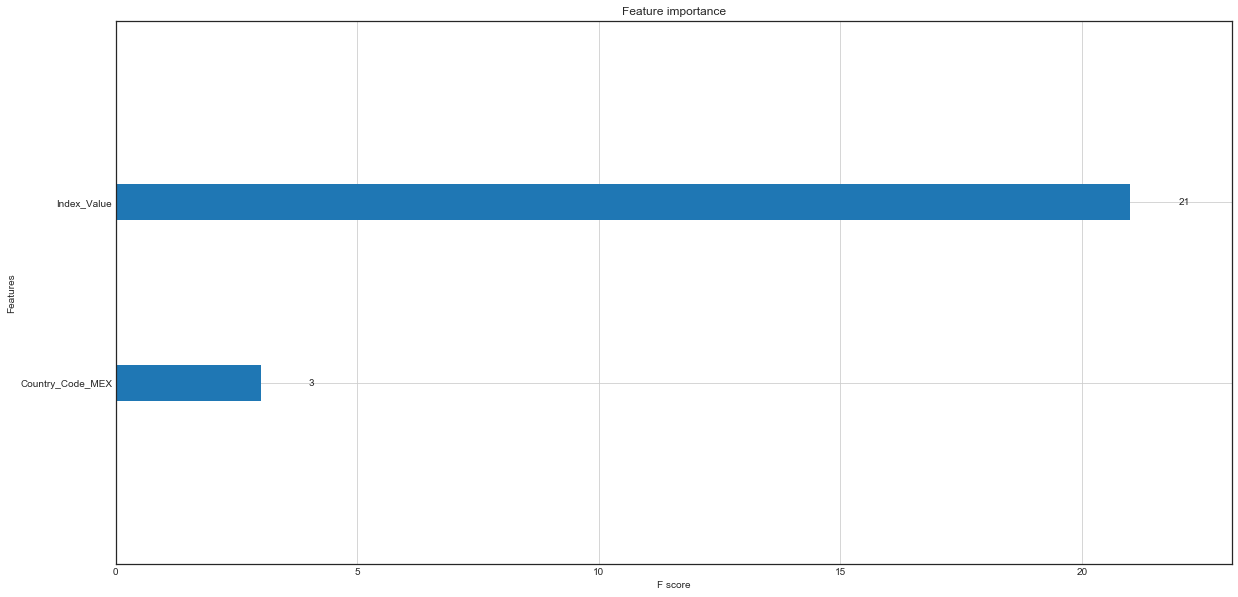

In [25]:
# xgboost classifier

from xgboost import plot_importance,XGBClassifier

model=XGBClassifier(n_estimators=1000,learning_rate=0.5)
model.fit(X_train,y_train,early_stopping_rounds=5,eval_set=[(X_test,y_test)])

plot_importance(model)
plt.show()

In [26]:
# xgboost cross validation

cross_val_score(model, X_test, y_test, cv=10)

array([ 0.99546279,  0.99274047,  0.99455041,  0.99364214,  0.9972752 ,
        0.99636694,  0.99455041,  0.99545455,  0.99545455,  0.99545455])

In [28]:
# xgboost recall score

y_pred = model.predict(X_test)
print("\tRecall: %1.3f" % recall_score(y_pred, y_test))

	Recall: 0.000


/Users/jamilab/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


In [39]:
del X_train
del X_test
del rfc
del model

NameError: name 'X_train' is not defined

In [40]:
# PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [41]:
pca.components_

array([[  1.00000000e+00,  -2.74525793e-09,  -1.29806039e-09,
          4.04331833e-09,  -4.90015667e-12,  -9.18778723e-12,
         -9.18778833e-12,  -1.37816922e-11,  -3.95074014e-11,
         -3.61385506e-11,  -3.61385377e-11,  -2.54195394e-11,
         -1.92943496e-11,  -1.92943514e-11,  -3.88950803e-11,
         -3.61387339e-11,  -3.61387329e-11,  -1.65381019e-11,
         -1.34754670e-11,  -1.34754736e-11,  -2.48073691e-11,
         -2.11321785e-11,  -1.96010656e-11,  -9.18799240e-13,
         -2.48075298e-11,  -2.48075457e-11,  -3.06264087e-13,
         -4.58819027e-12,  -5.16833834e-11,  -3.67519743e-12,
         -5.14934731e-11,  -3.67512444e-12,  -4.61861634e-11,
         -4.59400372e-12,  -9.53410383e-12,  -8.25843636e-12,
         -8.26917333e-12,  -1.04130800e-11,  -5.23712696e-11,
         -4.59399258e-12,  -4.59398978e-12,  -4.59398897e-12,
         -4.71649653e-11,  -4.28765016e-12,  -8.26902009e-12,
         -9.80029662e-12,  -1.31691520e-11,  -4.90014668e-12,
        

In [42]:
pca.transform(X)

array([[ -3.85712947e+06,  -3.99435604e-01],
       [ -3.85713024e+06,  -3.99352133e-01],
       [ -3.85713101e+06,  -3.99367712e-01],
       ..., 
       [ -3.85716389e+06,   7.92455988e-01],
       [ -3.85716376e+06,   7.93965669e-01],
       [ -3.85716367e+06,   7.92137063e-01]])

In [43]:
# percentage of variance in data explained by each component

pca.explained_variance_ratio_

array([  1.00000000e+00,   9.91307043e-16])

In [44]:
X_pca = pca.transform(X)

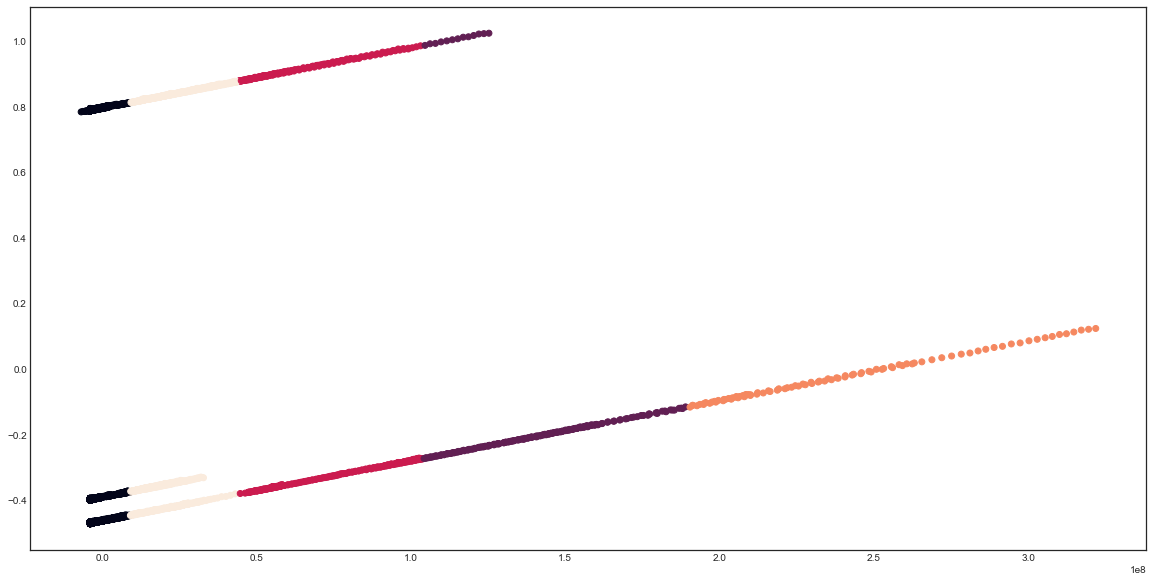

Comparing k-means clusters against the data:
Indicator_Code_SP.DYN.TFRT.IN      0    1
row_0                                    
0                              34834  171
1                                207    0
2                                419    0
3                                 93    0
4                                970    0


In [45]:
# k-means

from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

# Calculate predicted values.
km = KMeans(n_clusters=5, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=km)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(km, y))

In [95]:
# clusters look funny cuz categorical data

In [46]:
# Divide into training and test sets

X_train, X_test, y_train, y_test = train_test_split(
    X_pca,
    y,
    test_size=0.3,
    random_state=42)

In [47]:
# random forest classifier

rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train, y_train)
cross_val_score(rfc, X_test, y_test, cv=10)

array([ 0.99637024,  0.99455535,  0.99636694,  0.99545867,  0.99636694,
        0.99636694,  0.99545867,  0.99727273,  0.99272727,  0.99545455])

In [48]:
# rfc recall score

y_pred = rfc.predict(X_test)
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))

	Recall: 0.452


In [101]:
# recall much imporved after pca, was 7.1%, now 47%
# 26% pre pca, now 40%
# 14%/42%

Feature ranking:
1. feature 1 (0.708837)
2. feature 0 (0.291163)


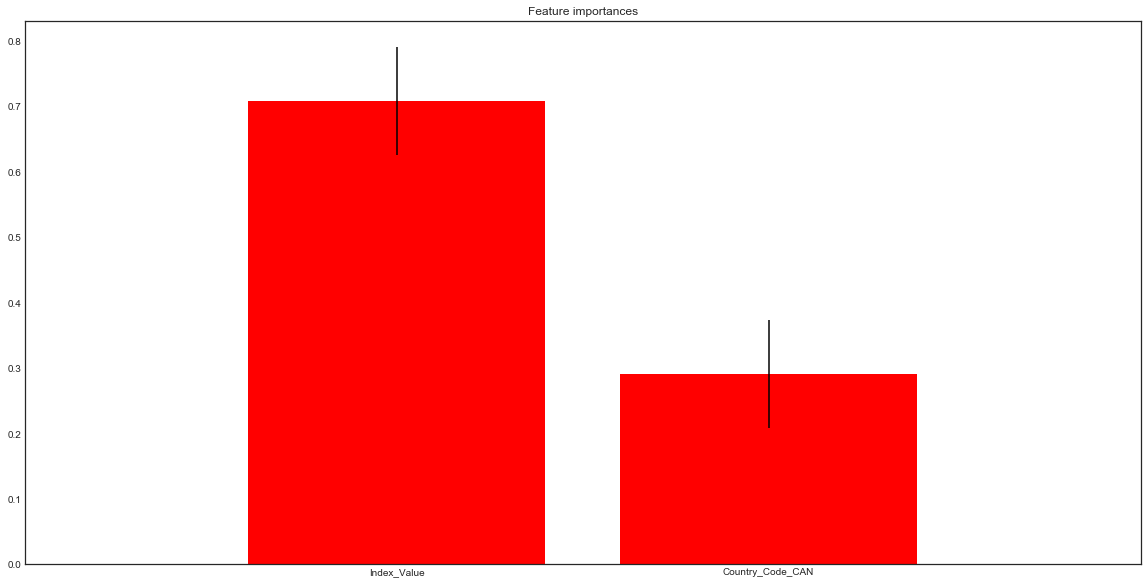

In [49]:
# calculate & plot feature importance

importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

feature_names = features.columns # e.g. ['A', 'B', 'C', 'D', 'E']
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
#plt.xticks(range(X_train.shape[1]), indices)
plt.xticks(range(X_train.shape[1]), feature_names)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [50]:
# gradient boost classifier

# We'll make 500 iterations, use 2-deep trees, and set loss function
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

In [51]:
# gradient boost classifier cross validation

cross_val_score(clf, X_test, y_test, cv=10)

array([ 0.99637024,  0.99546279,  0.99636694,  0.99545867,  0.9972752 ,
        0.99636694,  0.99545867,  0.99636364,  0.99636364,  0.99636364])

In [52]:
y_pred = clf.predict(X_test)
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))

	Recall: 0.381


[0]	validation_0-error:0.003815
Will train until validation_0-error hasn't improved in 5 rounds.
[1]	validation_0-error:0.003815
[2]	validation_0-error:0.003815
[3]	validation_0-error:0.003815
[4]	validation_0-error:0.003815
[5]	validation_0-error:0.003815
Stopping. Best iteration:
[0]	validation_0-error:0.003815



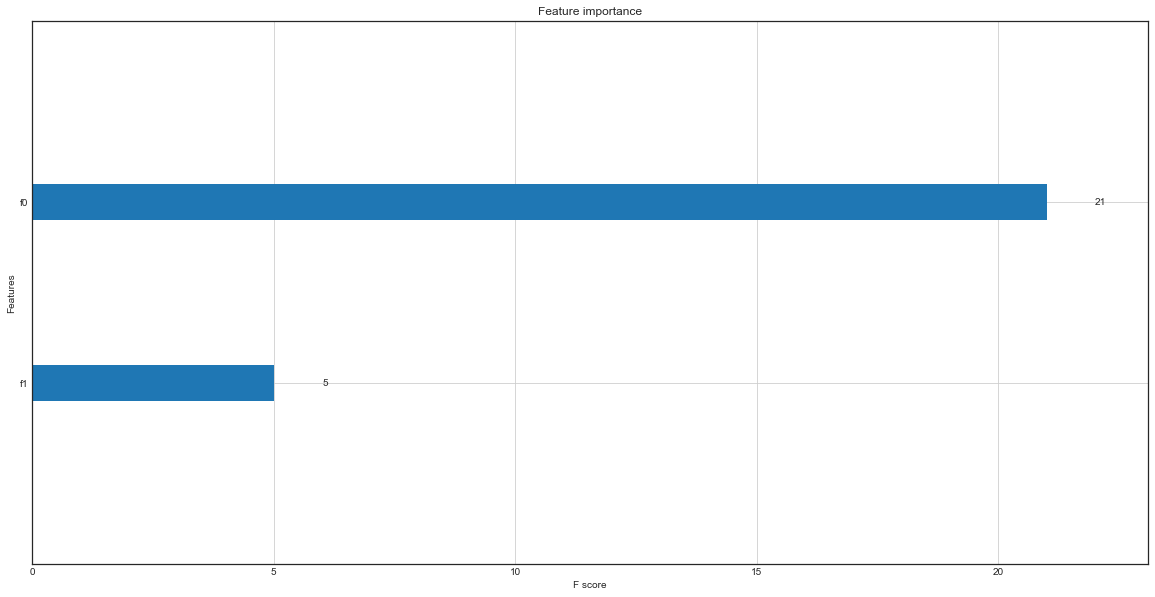

In [53]:
# xgboost classifier

xgb=XGBClassifier(n_estimators=1000,learning_rate=0.5)
xgb.fit(X_train,y_train,early_stopping_rounds=5,eval_set=[(X_test,y_test)])

plot_importance(xgb)
plt.show()

In [54]:
# xgboost cross validation

cross_val_score(xgb, X_test, y_test, cv=10)

array([ 0.99546279,  0.99546279,  0.9972752 ,  0.99545867,  0.99818347,
        0.99636694,  0.99636694,  0.99454545,  0.99727273,  0.99636364])

In [55]:
# xgboost recall score

y_pred = xgb.predict(X_test)
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))

	Recall: 0.000


In [56]:
del X
del y
del X_train
del X_test
del y_train
del y_test
del rfc
del model
del y_pred

In [57]:
# NORWAY MODEL EVALUATION

In [58]:
# create df of Norway data for model performance evaluation

nor = pd.DataFrame(stats[stats.Country=='Norway'])

In [59]:
# get dummies for Norway

features_nor = pd.get_dummies(nor[['Country_Code', 'Indicator_Code', 'Year', 'Index_Value']])

In [60]:
X = features_nor.drop(['Indicator_Code_SP.DYN.TFRT.IN', 'Indicator_Code_NY.GNP.PCAP.CD', 
                       'Indicator_Code_SP.POP.TOTL.MA.ZS', 'Indicator_Code_SP.POP.TOTL.FE.ZS', 
                       'Indicator_Code_SP.POP.TOTL.MA.IN', 'Indicator_Code_SP.POP.TOTL.FE.IN', 
                       'Indicator_Code_SP.POP.TOTL', 'Indicator_Code_SP.DYN.SMAM.MA', 'Indicator_Code_SP.DYN.SMAM.FE', 
                       'Indicator_Code_SP.DYN.AMRT.MA', 'Indicator_Code_SP.DYN.CONM.ZS', 
                       'Indicator_Code_SH.STA.MMRT.NE', 'Indicator_Code_SH.STA.OWAD.MA.ZS', 
                       'Indicator_Code_SH.STA.OWAD.FE.ZS', 'Indicator_Code_SH.MMR.RISK.ZS', 
                       'Indicator_Code_SH.DTH.COMM.ZS', 'Indicator_Code_SH.ANM.ALLW.ZS', 
                       'Indicator_Code_SP.POP.GROW'], 1)

y = features_nor[('Indicator_Code_SP.DYN.TFRT.IN')]

# Divide into training and test sets

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42)

In [61]:
rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train, y_train)

cross_val_score(rfc, X_test, y_test, cv=10)

array([ 0.99180328,  0.98907104,  0.98082192,  0.9890411 ,  0.99452055,
        0.99450549,  0.99450549,  0.99450549,  0.99725275,  0.99450549])

In [62]:
y_pred = rfc.predict(X_test)
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))

	Recall: 0.136


In [110]:
# recall is 31%, which is lower than rfc

[0]	validation_0-error:0.006855
Will train until validation_0-error hasn't improved in 5 rounds.
[1]	validation_0-error:0.006855
[2]	validation_0-error:0.006032
[3]	validation_0-error:0.006032
[4]	validation_0-error:0.003839
[5]	validation_0-error:0.003839
[6]	validation_0-error:0.003839
[7]	validation_0-error:0.003565
[8]	validation_0-error:0.003565
[9]	validation_0-error:0.004113
[10]	validation_0-error:0.004113
[11]	validation_0-error:0.004113
[12]	validation_0-error:0.004113
Stopping. Best iteration:
[7]	validation_0-error:0.003565



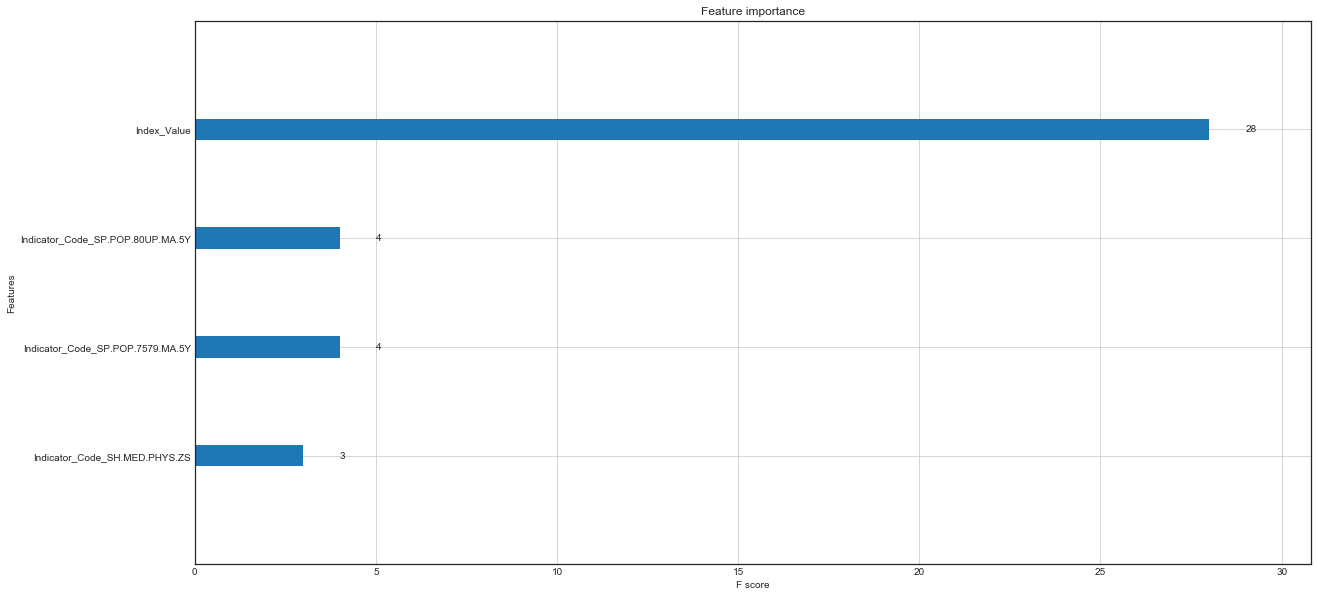

In [63]:
# xgboost classifier

model=XGBClassifier(n_estimators=1000,learning_rate=0.5)
model.fit(X_train,y_train,early_stopping_rounds=5,eval_set=[(X_test,y_test)])

plot_importance(model)
plt.show()

In [64]:
# xgboost cross validation

cross_val_score(model, X_test, y_test, cv=10)

array([ 0.99726776,  0.99453552,  0.99726027,  0.99726027,  0.99726027,
        1.        ,  0.99450549,  0.98901099,  0.99725275,  0.99450549])

In [65]:
# xgboost recall score

y_pred = model.predict(X_test)
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))

	Recall: 0.591


In [66]:
from catboost import CatBoostClassifier, FeaturesData

# Initialize CatBoostClassifier
cbc = CatBoostClassifier(iterations=2, learning_rate=1, depth=2, loss_function='Logloss')

# Fit model
cbc.fit(X_train, y_train)

# Get predicted classes
preds_class = cbc.predict(X_test)

# Get predicted probabilities for each class
preds_proba = cbc.predict_proba(X_test)

# Get predicted RawFormulaVal
y_pred = cbc.predict(X_test, prediction_type='RawFormulaVal')

0:	learn: 0.0267753	total: 109ms	remaining: 109ms
1:	learn: 0.0140356	total: 148ms	remaining: 0us


In [67]:
cross_val_score(cbc, X_test, y_test, cv=10)

0:	learn: 0.0337286	total: 29.2ms	remaining: 29.2ms
1:	learn: 0.0158121	total: 45.2ms	remaining: 0us
0:	learn: 0.0388739	total: 18.8ms	remaining: 18.8ms
1:	learn: 0.0210564	total: 35.3ms	remaining: 0us
0:	learn: 0.0342227	total: 22.5ms	remaining: 22.5ms
1:	learn: 0.0152244	total: 38.1ms	remaining: 0us
0:	learn: 0.0388785	total: 16.1ms	remaining: 16.1ms
1:	learn: 0.0221429	total: 31.4ms	remaining: 0us
0:	learn: 0.0403063	total: 20.6ms	remaining: 20.6ms
1:	learn: 0.0220806	total: 36.2ms	remaining: 0us
0:	learn: 0.0342005	total: 15.5ms	remaining: 15.5ms
1:	learn: 0.0218665	total: 32.8ms	remaining: 0us
0:	learn: 0.0342120	total: 20.9ms	remaining: 20.9ms
1:	learn: 0.0161145	total: 36.4ms	remaining: 0us
0:	learn: 0.0403042	total: 15.9ms	remaining: 15.9ms
1:	learn: 0.0164630	total: 32.9ms	remaining: 0us
0:	learn: 0.0403905	total: 21.9ms	remaining: 21.9ms
1:	learn: 0.0233733	total: 38.5ms	remaining: 0us
0:	learn: 0.0311559	total: 16.9ms	remaining: 16.9ms
1:	learn: 0.0152286	total: 31.5ms	remai

array([ 0.9890411 ,  0.99452055,  0.9890411 ,  0.99726027,  1.        ,
        0.9890411 ,  0.9890411 ,  1.        ,  1.        ,  0.98901099])

In [68]:
#cbc.fit(X_train, y_train)
y_pred = cbc.predict(X_test, prediction_type='RawFormulaVal')
print("\tRecall: %1.3f" % recall_score(preds_proba, y_test))

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

In [69]:
X = north_am.drop(['Country_Code', 'Country', 'Indicator_Name', 'Indicator_Code'], 1)
y = north_am[('Country')]

# Divide into training and test sets

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42)

In [70]:
# random forest classifier

rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train, y_train)

cross_val_score(rfc, X_test, y_test, cv=10)

array([ 0.55989111,  0.5753176 ,  0.55898367,  0.57259528,  0.54223433,
        0.57220708,  0.57818182,  0.57272727,  0.54636364,  0.58234759])

In [71]:
#from multiscorer import MultiScorer

#rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))

ValueError: Target is multiclass but average='binary'. Please choose another average setting.

In [73]:
# support vector machine classifier
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [74]:
# svc cross validation

cross_val_score(svc, X_test, y_test, cv=10)

array([ 0.40290381,  0.40199637,  0.40199637,  0.40834846,  0.39782016,
        0.40508629,  0.40272727,  0.41818182,  0.41090909,  0.39763421])

In [ ]:
# svc recall 
# error

y_pred = svc.predict(X_test)
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))

In [ ]:
# error
# Initialize CatBoostClassifier
cbc = CatBoostClassifier(iterations=2, learning_rate=1, depth=2, loss_function='Logloss')

# Fit model
cbc.fit(X_train, y_train)

# Get predicted classes
preds_class = cbc.predict(X_test)

# Get predicted probabilities for each class
preds_proba = cbc.predict_proba(X_test)

# Get predicted RawFormulaVal
y_pred = cbc.predict(X_test, prediction_type='RawFormulaVal')

In [77]:
# PCA

pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [78]:
pca.components_

array([[  1.58737316e-08,   1.00000000e+00],
       [ -1.00000000e+00,   1.58737316e-08]])

In [79]:
pca.transform(X)

array([[ -3.85712947e+06,   3.09626733e+01],
       [ -3.85713024e+06,   2.99626733e+01],
       [ -3.85713101e+06,   2.89626733e+01],
       ..., 
       [ -3.85716389e+06,  -2.30373272e+01],
       [ -3.85716376e+06,  -2.40373272e+01],
       [ -3.85716367e+06,  -2.50373272e+01]])

In [80]:
# percentage of variance in data explained by each component

pca.explained_variance_ratio_

array([  1.00000000e+00,   8.00060065e-13])

In [81]:
X_pca = pca.transform(X)

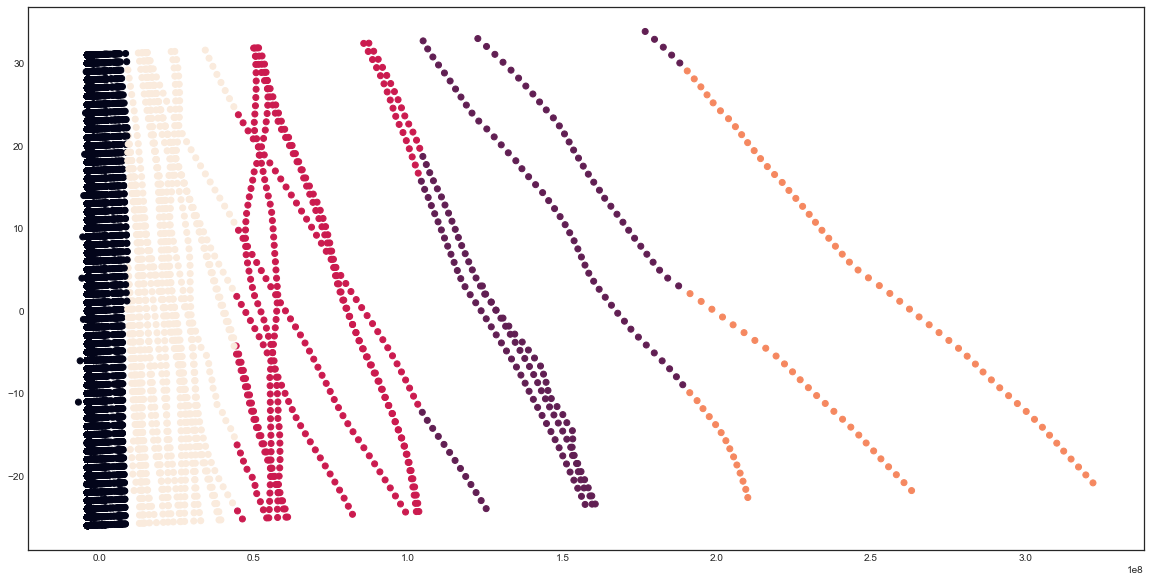

Comparing k-means clusters against the data:
Country  Canada  Mexico  United States
row_0                                 
0         11452   12202          11351
1             0      13            194
2             0     154            265
3             0       0             93
4           255     453            262


In [82]:
# k-means

# Calculate predicted values.
km = KMeans(n_clusters=5, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=km)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(km, y))

In [83]:
# Divide into training and test sets

X_train, X_test, y_train, y_test = train_test_split(
    X_pca,
    y,
    test_size=0.3,
    random_state=42)

In [84]:
# random forest classifier

rfc.fit(X_train, y_train)
cross_val_score(rfc, X_test, y_test, cv=10)

array([ 0.57441016,  0.57894737,  0.56987296,  0.57894737,  0.56948229,
        0.58128974,  0.59090909,  0.59636364,  0.54272727,  0.58507734])

In [ ]:
# rfc recall
# error

y_pred = rfc.predict(X_test)
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))

In [87]:
# gradient boost classifier

# We'll make 500 iterations, use 2-deep trees, and set loss function
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

In [88]:
# gradient boost classifier cross validation

cross_val_score(clf, X_test, y_test, cv=10)

array([ 0.6061706 ,  0.61705989,  0.61796733,  0.60163339,  0.58946412,
        0.61307902,  0.58727273,  0.60727273,  0.60181818,  0.59508644])

In [ ]:
#clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("\tRecall: %1.3f" % recall_score(y_test, predict_test))

In [ ]:
# Initialize CatBoostClassifier
cbc = CatBoostClassifier(iterations=2, learning_rate=1, depth=2, loss_function='Logloss')

# Fit model
cbc.fit(X_train, y_train)

# Get predicted classes
preds_class = cbc.predict(X_test)

# Get predicted probabilities for each class
preds_proba = cbc.predict_proba(X_test)

# Get predicted RawFormulaVal
y_pred = cbc.predict(X_test, prediction_type='RawFormulaVal')

In [ ]:
get_feature_importance(data=None,
                       fstr_type=EFstrType.FeatureImportance,                        
                       prettified=False, 
                       thread_count=-1,
                       verbose=False)